# Sequence-to-sequence models trained on mental health dataset

## Introduction

## SDGs

## Chatbots

Chatbots are computer programs that simulate human conversation with an end user. They are used for a variety of purposes, including customer service, marketing, and entertainment.

Chatbots can be broadly categorized into two types:

**Rule-based chatbots**: These chatbots follow predefined rules and patterns to respond to user queries. They are relatively simple to build but lack flexibility and can only handle a limited range of questions. Furthermore, they are not able to produce new text.

**Machine learning chatbots**: These chatbots utilize machine learning algorithms to learn from user interactions and improve their responses over time. They are more complex to build but offer greater flexibility and can handle a wider range of queries.

### How chatbots work

1. The user types or speaks a query.
2. The input is cleaned, tokenized, and transformed into a suitable format.
3. The chatbot identifies the user's intent (e.g., asking a question, making a request, providing feedback).
4. Relevant entities are extracted from the query (e.g., product names, locations, dates).
5. Response Generation:
  - Rule-Based Responses: Predefined responses for specific intents.
  - Generative Models: Generating text from scratch, using natural language processing.
6. The chatbot delivers the generated response to the user.

In this project, two machine learning approaches for natural language processing (NLP) are described and compared. They use the seq2seq architecture as described in the next section.

## Seq2seq

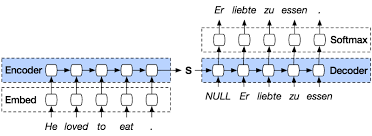

Seq2seq (Sequence-to-Sequence) is a type of neural network architecture commonly used in machine learning, particularly for tasks involving sequential data. It is well suited for chatbots because it allows the model to process an input sequence (e.g., a user's query) and generate an output sequence (e.g., a chatbot's response):

1. **Encoder:**
   * Takes an input sequence (e.g., a sentence) and processes it word by word.
   * Each word is represented as a numerical vector.
   * The encoder processes these vectors sequentially, capturing the underlying meaning and context.
   * The final state of the encoder, often called the "context vector," encapsulates the essence of the input sequence.

2. **Decoder:**
   * Generates the output sequence, one token at a time (e.g., word by word).
   * It starts with a special "start" token and uses the context vector from the encoder as initial input.
   * At each time step, the decoder predicts the next token based on its current state and the previous output token.
   * This process continues until a special "end" token is generated, indicating the end of the sequence.

The following aspects need to be considered, especially when comparing seq2seq models to classical rule-based models.

**Positive aspects:**

* Seq2seq models can capture the context of a conversation, allowing for more relevant and coherent responses.
* They can generate novel text.
* They can handle complex and open-ended queries that require understanding and reasoning.

**Negative aspects:**

* Requires large amounts of high-quality training data to create usable models.
* Can be computationally expensive to train and deploy.
* May sometimes generate incorrect or nonsensical responses.

### Relationship to common ML concepts

#### Problem type

In the context of chatbots, the primary problem being solved is **sequence-to-sequence generation**. This involves taking a given input sequence and generating a corresponding output sequence.

#### Common loss function

A common loss function used for seq2seq tasks is **cross-entropy loss**. It measures the difference between the predicted probability distribution over possible output sequences and the actual probability distribution (the ground truth).

#### Determining the number of classes

In the case of sequence-to-sequence generation, the concept of *classes* is not directly applicable. Instead, approaches deal with a certain vocabulary of words and phrases that can be used to construct responses.

The number of potential output tokens (words or subwords) determines the size of the output vocabulary. This vocabulary size can be:

1. **Fixed vocabulary:** A predefined set of words or tokens that the model is trained on (the two models presented here have fixed vocabularies).
2. **Dynamic vocabulary:** A vocabulary that expands as the model encounters new words during training or inference.

The choice of vocabulary size depends on factors such as the specific application, computational resources, and the desired level of language complexity.

**Example:**

The input sequence is 'What day is it?'

The output sequence is 'It is Monday.'

The vocabulary consists of the used output tokens, in this case:

```
['It', 'is', 'Monday', '.']
```

Therefore, the number of classes to predict would be equal to 4 for this example.

In practice, more training data is used, resulting in greater vocabularies.

## Recurrent Neural Networks

Recurrent Neural Networks (RNNs) are neural networks for processing sequential data, using "memory" to consider past information when processing the current input. RNNs are the building blocks of seq2seq models. Seq2seq models use two RNNs: an encoder to process the input sequence and a decoder to generate the output sequence.

### LSTM vs GRU

GRU (Gated Recurrent Unit) and LSTM (Long Short-Term Memory) are types of Recurrent Neural Networks (RNNs) designed to handle long-term dependencies in sequential data. Both use gates to control the flow of information through the network, but they differ in their architecture and complexity.

The choice between GRU and LSTM depends on the specific task and the nature of the sequential data. For shorter sequences or tasks that don't require capturing very long-term dependencies, GRU can be a good choice. For longer sequences or tasks that require capturing complex patterns, LSTM is more suitable.

## Attention Mechanism

In traditional encoder-decoder models, the encoder processes the input sequence and compresses it into a fixed-length vector, known as the context vector. The decoder then uses this context vector to generate the output sequence. However, this approach can be limiting, especially for long input sequences, as it's difficult to capture all the relevant information in a single vector.

**Attention Mechanism** addresses this limitation by allowing the decoder to focus on different parts of the input sequence at different timesteps during the decoding process. It does this by assigning weights to different parts of the input sequence, indicating their relevance to the current output token:

1. **Encoder:** The encoder processes the input sequence and generates a hidden state for each input token.
2. **Decoder:**
    - At each timestep, the decoder calculates an attention score for each encoder hidden state.
    - These scores represent the relevance of each encoder hidden state to the current decoder state.
    - The scores are then normalized using a softmax function to obtain attention weights.
    - The attention weights are used to compute a weighted sum of the encoder hidden states, creating a context vector that is specific to the current decoding step.
    - The decoder uses this context vector, along with its previous hidden state, to generate the next output token.

**Pros:**

* Attention mechanisms allow the model to focus on the most relevant parts of the input sequence, leading to more accurate outputs.
* By selectively attending to different parts of the input, the model can handle longer sequences more effectively.

An attention mechanism is used in the improved model of this project.

## Teacher Forcing

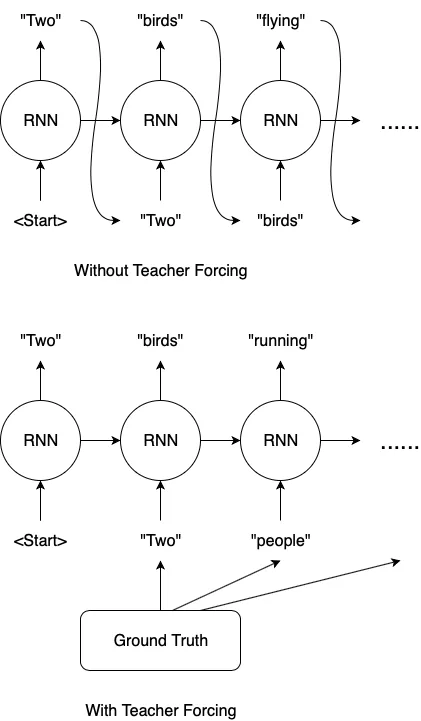

Teacher forcing is a technique used to train encoder-decoder and seq2seq models. It involves feeding the ground truth output at each time step as input to the model for the next time step, instead of using the model's own prediction:

1. The decoder starts with an initial input, such as a special start token or the first ground truth output.
2. At each subsequent time step, the ground truth output from the previous time step is fed as input to the decoder.
3. The decoder's RNN (LSTM or GRU) processes the input (ground truth output) and the previous hidden state to generate a new hidden state.
4. The new hidden state is used to predict the next output.
5. This process continues for the entire sequence, with the ground truth output guiding the model's predictions at each step.

**Pros:**

* It can help stabilize the training process, especially when the model's initial predictions are inaccurate.
* By providing more accurate information, teacher forcing can lead to faster convergence during training.
* It can help the model learn better representations and make more accurate predictions.

**Con:**

* Overreliance on teacher forcing can lead to exposure bias, where the model becomes too dependent on the ground truth and struggles to generate accurate outputs when faced with its own predictions during inference.

Both the initial and improved models make use of teacher forcing.

## BLEU score

**BLEU (Bilingual Evaluation Understudy)** is a metric used to evaluate the quality of machine-generated text, particularly in the context of machine translation, but also chatbots. It compares the generated text to one or more reference translations (answers) created by human experts.

**How does BLEU work?**

1. **N-gram Precision:**
   - It breaks down the generated text and reference answers into n-grams (sequences of n consecutive words).
   - It calculates the precision of each n-gram, which is the proportion of n-grams in the generated text that also appear in the reference answers.
   - Typically, n-grams of different lengths (e.g., unigrams, bigrams, trigrams, and four-grams) are considered.

2. **Brevity Penalty:**
   - To avoid overly short answers that might have high precision but lack content, a brevity penalty is applied.
   - If the generated text is shorter than the reference answers, a penalty is imposed to discourage overly concise outputs.

3. **Geometric Mean:**
   - The final BLEU score is calculated as the geometric mean of the precision scores for different n-grams, weighted by their importance.
   - This ensures that the model is rewarded for producing accurate answers at multiple levels of granularity.

**Interpretation:**

- A higher BLEU score indicates that the machine-generated text is more similar to human-quality answers.
- However, it's important to note that BLEU is not a perfect metric. It can be sensitive to certain linguistic nuances and may not fully capture semantic similarity.
- A high BLEU score should be combined with human evaluation to assess the overall quality of the generated text.

## Perplexity

Perplexity (PPL) is a metric used to evaluate language models. It measures how well a model predicts a sequence of words. Lower perplexity indicates better performance, meaning the model's predictions are closer to the actual sequence. Essentially, it reflects the model's ability to handle uncertainty in predicting the next word in a sequence.

It can be calculated by putting the cross-entropy loss into an exponential function.

## Mental Health Chatbot Seq2seq project outline

Following are the most important facts about this Jupyter Notebook.

- Number of approaches to compare: 2
- Architecture type: seq2seq
- Dataset used: Mental health questions and answers consisting of 97 rows
- Model input size: equal to the number of tokens in the question vocabulary
- Model output size (classes): equal to the number of tokens in the answer vocabulary
- Loss function: cross-entropy loss
- Number of epochs: Models are trained until they start to overfit
- Model evaluation: BLEU score and perplexity

The main differences of the two approaches are:

- More sophisticated creation of the input and output vocabularies in the second approach
- Encoder/decoder model of the second approach uses an attention mechanism

Outlook: the second Jupyter Notebook deals with the fine-tuning of a lightweight language model to achieve far greater results.

# Initial model

The following procedure to train a mental health chatbot is based on this Jupyter Notebook from GitHub https://github.com/pandeyanuradha/Chatbot-for-mental-health/blob/main/Models/Generative_based.ipynb.

## Loading data and preliminary analysis

This code snippet sets up the environment for the mental health chatbot by installing necessary libraries from a `requirements.txt` file using `pip`.

In [1]:
%cd mental-health-chatbot/

/home/jovyan/mental-health-chatbot


In [2]:
# Install dependencies

%pip install -r 'requirements.txt'

  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached torch-2.2.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchtext-0.17.0-cp311-cp311-manylinux1_x86_64.whl.metadata (7.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
  Using cached triton-2.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
  Using cached torchdata-0.7.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with othe

In [3]:
import random
import numpy as np
import torch

seed = 1234

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

The following code snippet imports necessary libraries for building and visualizing the mental health chatbot. It imports `re` for regular expressions, `random` for generating random numbers, `pandas` for data manipulation, `numpy` for numerical operations, `plot_model` from `tensorflow.keras.utils` for visualizing the model structure, `load_model` from `keras.models` for loading pre-trained models, and `matplotlib.pyplot` for plotting graphs. Additionally, it sets a pandas option to suppress chained assignment warnings. These imports and configuration settings prepare the environment for subsequent steps in the chatbot development process.

In [4]:
import re
import pandas as pd
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
path_to_csv = 'mentalhealth.csv'

2024-12-01 23:30:15.957392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733095815.975731  274730 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733095815.981452  274730 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 23:30:15.999752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Pandas is used to load the training data from the `mentalhealth.csv` file into a DataFrame.

In [5]:
data = pd.read_csv(path_to_csv)

5 random rows of the DataFrame are examined.

In [6]:
data.sample(5)

,Question_ID,Questions,Answers
40,4134858,How can I manage grief?,While a lot of people think of grief in terms ...
78,9020440,What is cyclothymic disorder?,Cyclothymic disorder is a subtype of bipolar d...
93,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
91,4294616,How can I find help for an alcohol or drug use...,Seeking to make changes in the way you use sub...
63,8471978,I was prescribed an antidepressant or other ps...,"If you’re concerned about your medications, it..."


The DataFrame has three columns:

1.   `Question_ID`: the unique ID of the row
2.   `Questions`: mental health related questions
3.   `Answers`: mental health related answers

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question_ID  97 non-null     int64 
 1   Questions    97 non-null     object
 2   Answers      97 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


There are 3 columns and 97 rows in the dataset.

In [8]:
data.shape

(97, 3)

`data.isna().sum()` helps identify the presence and count of missing values within the dataset, allowing to assess data quality and potentially handle missing values before proceeding with further analysis or model training. No values are missing in this dataset.

In [9]:
data.isna().sum()

Question_ID    0
Questions      0
Answers        0
dtype: int64

This code block focuses on cleaning and preparing the 'Answers' column of the dataset for further use. It iterates through each answer in the dataset and applies a series of regular expression substitutions to remove or replace specific characters and patterns. Special characters that interfere with model training are removed. They don't contribute to the meaning of text when processed by algorithms and can introduce errors or confusion. Therefore, it's necessary to remove them during text analysis.



In [10]:
for i in range(data.shape[0]):
  data.loc[i, 'Answers'] = re.sub(r'\n', ' ', data.loc[i, 'Answers'])
  data.loc[i, 'Answers'] = re.sub('\(', '', data.loc[i, 'Answers'])
  data.loc[i, 'Answers'] = re.sub(r'\)', '', data.loc[i, 'Answers'])
  data.loc[i, 'Answers'] = re.sub(r',', ' ', data.loc[i, 'Answers'])
  data.loc[i, 'Answers'] = re.sub(r'-', '', data.loc[i, 'Answers'])
  data.loc[i, 'Answers'] = re.sub(r'/', '', data.loc[i, 'Answers'])

Next, a list of question and answer pairs is created to be used for data preprocessing.

In [11]:
pairs = []

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]), data['Answers'][i]))

In [12]:
pairs[0]

('What does it mean to have a mental illness?',
 "Mental illnesses are health conditions that disrupt a person's thoughts  emotions  relationships  and daily functioning.")

## Data preprocessing

The following code snippet creates lists of questions, answers, question word counts and answer word counts. `<START>` and `<END>` tokens are added to the beginning and end of each answer to help the model understand the start and end of a response. All indivudial words in the questions and answers are added to vocabulary sets.

> Vocabulary in NLP refers to the set of unique words that the system knows from a corpus. It's crucial because it forms the basis of how machines interpret the texts. Each word in the vocabulary is indexed and often given a vector representation that captures its meaning and relation to other words.

-- A S M Morshedul Hoque

Furthermore, the texts are tokenized which means that the text is broken down into smaller units called tokens, which can be words, phrases, or symbols. It’s an important step in natural language processing (NLP) to prepare text for analysis.

In [13]:
questions = []
answers = []
question_tokens = set()
answer_tokens = set()

for line in pairs:
  question, answer = line[0], line[1]

  questions.append(question)

  # Splitting words from punctuation
  answer = " ".join(re.findall(r"[\w']+|[^\s\w]", answer))

  # Redefine answer and append it to answers
  answer = '<START> ' + answer + ' <END>'

  answers.append(answer)

  for token in re.findall(r"[\w']+|[^\s\w]", question):
    if token not in question_tokens:
      question_tokens.add(token)

  for token in answer.split():
    if token not in answer_tokens:
      answer_tokens.add(token)

question_tokens = sorted(list(question_tokens))
answer_tokens = sorted(list(answer_tokens))
num_encoder_tokens = len(question_tokens)
num_decoder_tokens = len(answer_tokens)

In [14]:
questions[:5]

['What does it mean to have a mental illness?',
 'Who does mental illness affect?',
 'What are some of the warning signs of mental illness?',
 'Can people with mental illness recover?',
 'What should I do if I know someone who appears to have the symptoms of a mental disorder?']

In [15]:
answers[:5]

["<START> Mental illnesses are health conditions that disrupt a person's thoughts emotions relationships and daily functioning . <END>",
 '<START> Mental illness does can affect anyone regardless of gender age income social status ethnicity religion sexual orientation or background . <END>',
 '<START> Symptoms of mental health disorders vary depending on the type and severity of the condition . <END>',
 '<START> When healing from mental illness early identification and treatment are of vital importance . <END>',
 '<START> We encourage those with symptoms to talk to their friends and family members and seek the counsel of a mental health professional . <END>']

This code snippet is creating dictionaries to map words to numerical indices and vice versa for both the questions (input) and the answers (target). This is a common step in NLP because machine learning models work with numbers, not raw text.

In [16]:
input_features_dict = dict([(token, i) for i, token in enumerate(question_tokens)])
target_features_dict = dict([(token, i) for i, token in enumerate(answer_tokens)])

reverse_input_features_dict = dict((i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict((i, token) for token, i in target_features_dict.items())

In [17]:
print('There are {} tokens in the input (question) vocabulary'.format(len(input_features_dict)))
print('There are {} tokens in the target (answer) vocabulary'.format(len(target_features_dict)))

There are 282 tokens in the input (question) vocabulary
There are 3101 tokens in the target (answer) vocabulary


## Encoder - Decoder Model

In the following code section one-hot encoded input and target sequences are created for model training.

One-hot encoding is a method for converting each token into a binary vector. This allows machine learning models to work with categorial data.

Neural networks require inputs of consistent shapes. Therefore, the maximum sequence lengths set the dimensions for the longest possible sequence, ensuring each sequence fits within the tensor shape. This avoids dimension mismatches that would cause errors during model training.

Not all input or output sequences will be as long as the maximum sequence length. So, sequences that are shorter get "padded" with zeros up to the maximum length.

Each token in the sequences is represented as a vector. A vector has a length equal to the vocabulary size and a specific position corresponding to the token's index in the vocabulary is set to 1, while all other positions are 0.

`decoder_target_data` is offset by one timestep; this is used for teacher forcing during training, where the target output at time `t` depends on the decoder input at time` t-1`.




In [18]:
def create_one_hot_vectors(questions, answers):
  max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in questions])
  max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in answers])

  encoder_input_data = np.zeros(
      (len(questions), max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
  decoder_input_data = np.zeros(
      (len(questions), max_decoder_seq_length, num_decoder_tokens),
      dtype='float32')
  decoder_target_data = np.zeros(
      (len(answers), max_decoder_seq_length, num_decoder_tokens),
      dtype='float32')

  for line, (input_doc, target_doc) in enumerate(zip(questions, answers)):
      for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
          encoder_input_data[line, timestep, input_features_dict[token]] = 1

      for timestep, token in enumerate(target_doc.split()):
          decoder_input_data[line, timestep, target_features_dict[token]] = 1
          if timestep > 0:
              decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1

  return encoder_input_data, decoder_input_data, decoder_target_data

This code snippet splits a dataset of `questions` and `answers` into training, testing, and validation sets, ensuring reproducibility with a fixed `random_state`. The initial split allocates 70% of the data to training and 30% to a combined "other" set. The "other" set is then further divided into testing (70%) and validation (30%) subsets. After splitting, the data is processed using a `create_one_hot_vectors` function, which converts the questions and answers into three components: encoder input data, decoder input data, and decoder target data. These components are formatted as one-hot or integer-encoded vectors, preparing them for use in a sequence-to-sequence machine learning model. The resulting data subsets are ready for training, validation, and testing phases.

In [19]:
from sklearn.model_selection import train_test_split

train_questions, other_questions = train_test_split(questions, test_size=0.3, random_state=1)
train_answers, other_answers = train_test_split(answers, test_size=0.3, random_state=1)

test_questions, val_questions = train_test_split(other_questions, test_size=0.3, random_state=1)
test_answers, val_answers = train_test_split(other_answers, test_size=0.3, random_state=1)

train_encoder_input_data, train_decoder_input_data, train_decoder_target_data = create_one_hot_vectors(train_questions, train_answers)
test_encoder_input_data, test_decoder_input_data, test_decoder_target_data = create_one_hot_vectors(test_questions, test_answers)
val_encoder_input_data, val_decoder_input_data, val_decoder_target_data = create_one_hot_vectors(val_questions, val_answers)

The shapes of the encoder and decoder arrays:

**67**: The number of input sequences (the number of rows in `questions`).

**53**: The maximum length (in terms of tokens) of input sequences (`max_encoder_seq_length`), i.e., the longest sequence length in `questions`.

**282**: The size of the input vocabulary (`num_encoder_tokens`), representing the total number of unique tokens in the questions dataset.

In [20]:
train_encoder_input_data.shape

(67, 53, 282)

**67**: The number of output sequences (the number of rows in `answers`).

**1642**: The maximum length (in tokens) of output sequences (max_decoder_seq_length), i.e., the longest sequence length in `answers`.

**3101**: The size of the output vocabulary (`num_decoder_tokens`), representing the total number of unique tokens in the answers dataset.

In [21]:
train_decoder_target_data.shape

(67, 1642, 3101)

## Training

The following code snippet is essentially building the core of a chatbot using a specific type of neural network architecture called an encoder-decoder model with LSTM (Long Short-Term Memory) layers. LSTM is a type of recurrent neural network layer that's good at processing sequential data like text.

In [22]:
from tensorflow import keras
from keras.layers import Input, LSTM, Dense
from keras.models import Model

# This determines the size of the internal representation of the data within
# the LSTM units. A higher dimensionality can capture more complex patterns
# but may increase computational cost.
dimensionality = 256

# Specifies the batch size for training. The batch size is the number of
# samples processed before the model's internal parameters are updated.
batch_size = 16

# Defines the number of training epochs. An epoch is one complete pass
# through the entire training dataset.
epochs = 20

# This code snippet defines the encoder part of a sequence-to-sequence model,
# where encoder_inputs is created as an input layer to receive variable-length
# sequences. An LSTM layer, encoder_lstm, processes this input to understand the
# sequence and produces encoder_outputs along with its internal states
# (state_hidden, state_cell), which are then stored as encoder_states to be
# passed to the decoder, effectively capturing the essence of the input sequence.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]

# The decoder takes the encoded information from the encoder, processes it
# step-by-step using the LSTM, and uses the Dense output layer to predict the
# next word in the response, ultimately generating a complete response sequence.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# The `softmax` activation function converts the output of the Dense layer
# into probabilities. Each probability represents the likelihood of a particular
# token being the next word in the response.
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

W0000 00:00:1733095818.633416  274730 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


The following line creates the final training model by combining the encoder and decoder components.

In [23]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

This model is structured for generating sequences, where an input sequence is encoded and then decoded to produce an output sequence.

In [24]:
training_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 282) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ 3101)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 256),     │    551,936 │ input_layer[0][0] │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │  3,438,592 │ input_layer_1[0]… │
│                     │ 256), (None,      │            │ lstm[0][1],       │
│                     │ 256), (None,      │            │ lstm[0][2]        │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │    796,957 │ lstm_1[0][0]      │
│                     │ 3101)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,787,485 (18.26 MB)

 Trainable params: 4,787,485 (18.26 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


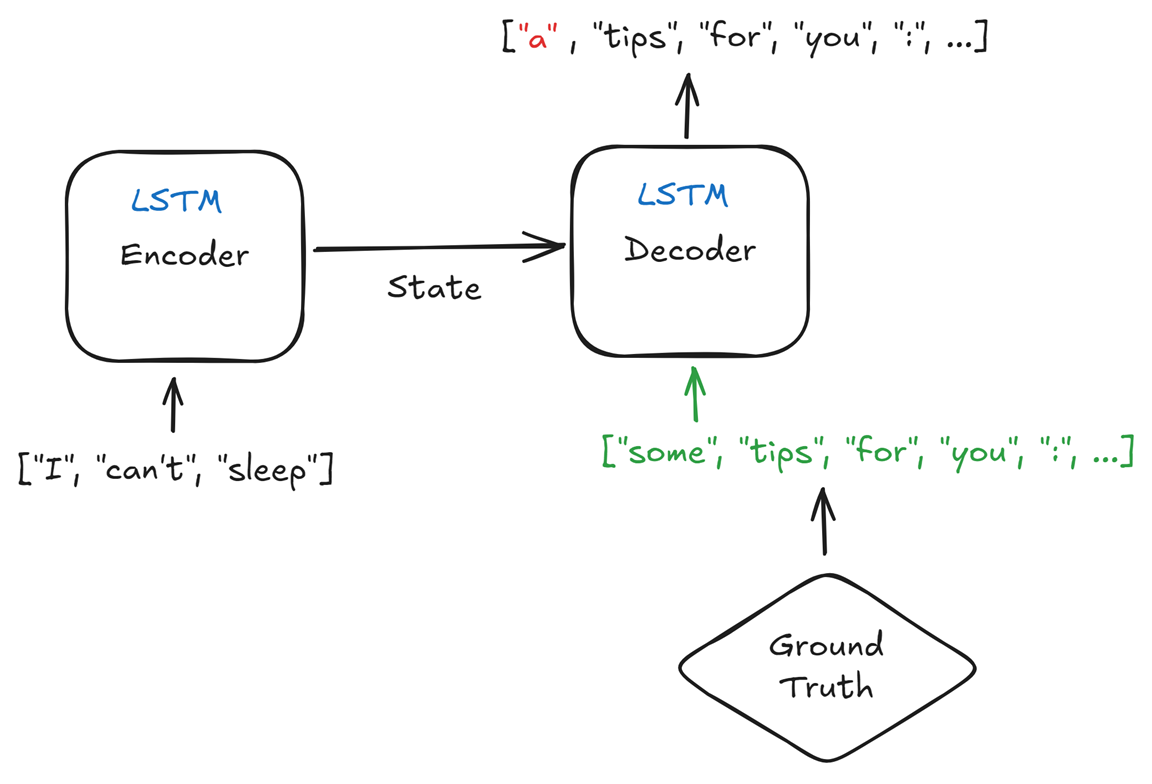

The following code compiles the model using the `adam` optimizer and `categorical_crossentropy` loss function (suitable for one-hot encoded targets). It then trains `training_model` on `train_encoder_input_data` and `train_decoder_input_data` (the input sequences for the encoder and decoder) to predict `train_decoder_target_data`, with training running for the specified number of epochs and batch size, and using the previously designated validation data for validation. Finally, the trained model is saved to a file named `training_model.keras` for future use.

In [26]:
training_model.compile(optimizer='adam', loss='categorical_crossentropy')
history1=training_model.fit(
    [train_encoder_input_data, train_decoder_input_data], 
    train_decoder_target_data, 
    batch_size = batch_size, 
    epochs = epochs, 
    validation_data=([val_encoder_input_data, val_decoder_input_data], val_decoder_target_data))
training_model.save('training_model.keras')

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 167s 32s/step - loss: 1.0797 - val_loss: 2.9262
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 155s 30s/step - loss: 1.1285 - val_loss: 2.7929
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 159s 31s/step - loss: 0.8872 - val_loss: 2.5543
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 158s 31s/step - loss: 0.9167 - val_loss: 2.4726
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 158s 31s/step - loss: 0.8429 - val_loss: 2.4633
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 31s/step - loss: 0.8797 - val_loss: 2.4571
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 30s/step - loss: 0.9009 - val_loss: 2.4567
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 157s 31s/step - loss: 0.8977 - val_loss: 2.4590
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 30s/step - loss: 0.9275 - val_loss: 2.4616
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 152s 29s/step - loss: 0.8361 - val_loss: 2.4639
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 155s 30s/step - loss: 0.9532 - val_loss: 2.4615
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 157s 31s/step - loss: 0.9014 - val_lo

Training and validation loss are not improving over the training period.

Due to the considerably higher validation loss, the model shows signs of **overfitting**. This suggests that the model is fitting the training data too closely, and its performance on unseen data could be improved by using techniques like early stopping, regularization, or using more training data.

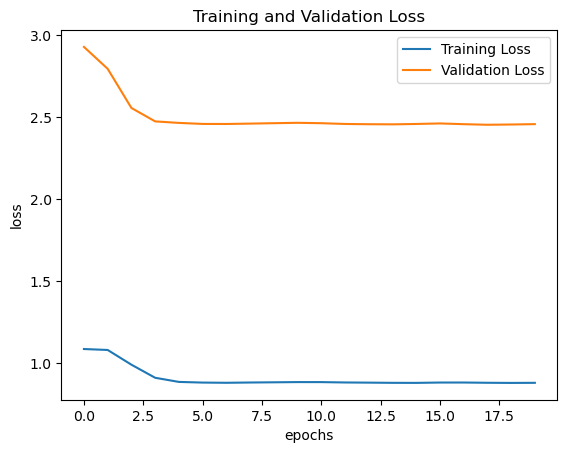

In [27]:
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

The validation perplexity improves from over 18 to 12, but does not keep on improving after that.

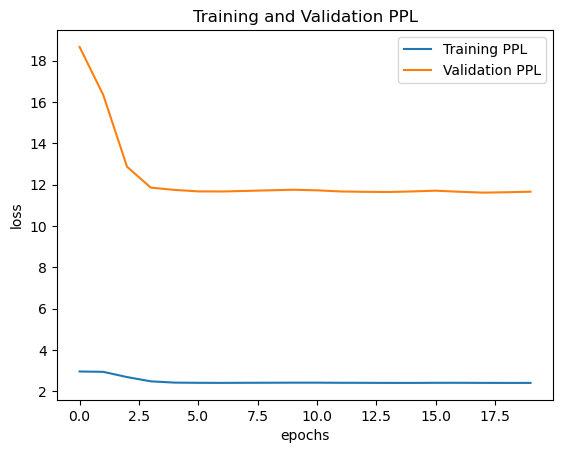

In [29]:
train_perplexity = np.exp(history1.history['loss'])
val_perplexity = np.exp(history1.history['val_loss'])

plt.plot(train_perplexity, label='Training PPL')
plt.plot(val_perplexity, label='Validation PPL')
plt.legend(loc='upper right')
plt.title('Training and Validation PPL')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

An ideal perplexity would be 1, the test PPL of 10 indicates considerable performance problems with the model.

In [31]:
# Evaluate the model on test data
test_loss = training_model.evaluate(
    [test_encoder_input_data, test_decoder_input_data],
    test_decoder_target_data,
    batch_size=batch_size
)

print(f"Test Loss: {test_loss:.4f}, Test PPL: {np.exp(test_loss):.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 982ms/step - loss: 2.2927
Test Loss: 2.3155, Test PPL: 10.1296


## Inference

This code defines and prepares components for the sequence-to-sequence model for inference. The `decode_response` function implements the decoding logic: given an input sequence, it uses the encoder to obtain initial states and iteratively predicts tokens using the decoder until the end of the sequence is reached, constructing a response token by token. This enables the model to perform inference on new inputs.

In [114]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in questions])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in answers])

training_model = load_model('training_model.keras')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)

    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.

    #A variable to store our response word by word
    decoded_sentence = ''

    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)

          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token

          #Stop if hit max length or found the stop token
          if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

          #Update the target sequence
          target_seq = np.zeros((1, 1, num_decoder_tokens))
          target_seq[0, 0, sampled_token_index] = 1.

          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

The following function converts a user-provided string into a one-hot encoded 3D matrix representation suitable for input to the sequence-to-sequence model's encoder.

In [115]:
def string_to_matrix(user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix

In [116]:
def answer_question(question):
    matrix = string_to_matrix(question)
    return decode_response(matrix)

The responses of this original model are not accurate, due to the simplicity of the used LSTM model and the limited set of input data.

The model described in the subsequent sections aims at improving the quality while still being constrained by the limited amount of input data.

In [130]:
answer_question('I feel sad')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

" conference conference conference opinion readers conference fragmented fragmented fragmented fragmented injuries injuries injuries injuries injuries injuries hoarding hoarding Children depressive > key > key metabolized metabolized metabolized metabolized ordered ordered puts Stress disprove counselling Friday Friday entire known effective faces faces sharing preparing Sorting precautions Educate Sorting fairly offer consumers Try goal Conditions Exercise human Or i chronic Obsessivecompulsive confused collected collected counterproductive conflict conflict conflict conflict expressing expressing ready media media schools unexplainable unexplainable campuses okay held held potential afraid afraid art solutionsfocused solutionsfocused solutionsfocused impacts trails Mainland rarely Mainland cagetsupportvirtual Care DID Along expected HealthLink 18007842433 Parks Parks forms rarely Assistance toll actively Wellness propylene DVD DVD moving obsessivecompulsive taking interpret myth myth

All attempts to calculate the BLEU score for this model on the training data failed. Every time `answer_question` is called, the system's resource usage reaches its maximum and the environment crashes after a few minutes. For this reason, it is not possible to provide a BLEU score for this initial model.

# Improved model

As previously shown, the initial model tends to overfit and its predictions are highly inaccurate.

In the following sections, different techniques are applied to improve the quality of the model. The approach is inspired by this Jupyter Notebook: https://github.com/bentrevett/pytorch-seq2seq/blob/main/3%20-%20Neural%20Machine%20Translation%20by%20Jointly%20Learning%20to%20Align%20and%20Translate.ipynb.

Firstly, a dedicated library for tokenization and the removal of special characters is used (`spacy`). Secondly, PyTorch instead of Keras is used. Lastly, the architecture of the encoder/decoder model is slightly more advanced, using an attention mechanism. These measures are expected to improve the overall quality of the model - although any major increases in model performance cannot be expected, as the size of the dataset is very small with just 97 series and seq2seq models require extensive and diverse datasets to reach good results.

## Data preprocessing

- **`torch`**: Core PyTorch library for building and training neural networks.  
- **`torch.nn`**: Contains PyTorch modules and classes for defining neural network layers and models.  
- **`torch.optim`**: Provides optimization algorithms like SGD and Adam for training models.  
- **`random`**: Python library for generating random numbers and shuffling data.  
- **`numpy`**: Numerical computing library for array and matrix operations.  
- **`spacy`**: NLP library for tokenization, parsing, and linguistic analysis.  
- **`datasets`**: Hugging Face library for accessing ready-to-use datasets.  
- **`torchtext`**: PyTorch library for text preprocessing and datasets.  
- **`tqdm`**: Library for displaying progress bars during loops.  

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import spacy
import datasets
import torchtext
import tqdm

In [5]:
import pandas as pd

Pandas is used to load the training data from the `mentalhealth.csv` file into a DataFrame.

In [6]:
dataset = pd.read_csv('mentalhealth.csv')

In [117]:
dataset.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,"Mental illness does can affect anyone, regardl..."
2,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
3,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
4,1619387,What should I do if I know someone who appears...,We encourage those with symptoms to talk to th...


In [7]:
from sklearn.model_selection import train_test_split

The data is split into training, validation and testing datasets.

In [8]:
train_data, other_data = train_test_split(dataset, test_size=0.3, random_state=1)

test_data, val_data = train_test_split(other_data, test_size=0.3, random_state=1)

In [120]:
train_data.head()

,Question_ID,Questions,Answers
74,4893447,What’s the difference between anxiety and an a...,Anxiety is a normal reaction to many different...
56,5981663,What is MSP?,MSP stands for Medical Services Plan. It’s a h...
96,3221856,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ..."
44,7009409,How can I see a counsellor?,You can find directories of counsellors throug...
54,2176317,How can I pay for mental health care?,Mental health services provided through the go...


An English dictionary is downloaded using `spacy` and a tokenizer is setup that uses this dictionary.

In [9]:
!python -m spacy download en_core_web_sm
en_nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
string = "What a lovely day it is today!"

[token.text for token in en_nlp.tokenizer(string)]

['What', 'a', 'lovely', 'day', 'it', 'is', 'today', '!']

This function tokenizes a list of input strings using the NLP tokenizer (`en_nlp.tokenizer`), limiting each string to 1,000 tokens. It converts tokens to lowercase and adds a start-of-sequence (`<sos>`) and end-of-sequence (`<eos>`) token to each sequence. The result is a list of tokenized strings, with each string represented as a list of tokens.

SpaCy's tokenizer is more powerful than the manual approach shown in the initial model. For example, SpaCy is designed to handle a wide range of linguistic features, including punctuation and special characters leading to a more accurate and consistent tokenization.


In [11]:
sos_token = "<sos>"
eos_token = "<eos>"

def tokenize(input):
  max_length = 1_000

  token_list = []
  for value in input:
    tokens = [token.text for token in en_nlp.tokenizer(value)[:max_length]]
    tokens = [token.lower() for token in tokens]
    tokens = [sos_token] + tokens + [eos_token]
    token_list.append(tokens)
  return token_list

In [12]:
def tokenize_questions_and_answers(dataset):
    t_questions = tokenize(dataset['Questions'])
    t_answers = tokenize(dataset['Answers'])

    dataset['t_Questions'] = t_questions
    dataset['t_Answers'] = t_answers

The tokenized data is added to the datasets.

In [13]:
tokenize_questions_and_answers(train_data)
tokenize_questions_and_answers(test_data)
tokenize_questions_and_answers(val_data)

In [126]:
train_data.head(5)

,Question_ID,Questions,Answers,t_Questions,t_Answers
74,4893447,What’s the difference between anxiety and an a...,Anxiety is a normal reaction to many different...,"[<sos>, what, ’s, the, difference, between, an...","[<sos>, anxiety, is, a, normal, reaction, to, ..."
56,5981663,What is MSP?,MSP stands for Medical Services Plan. It’s a h...,"[<sos>, what, is, msp, ?, <eos>]","[<sos>, msp, stands, for, medical, services, p..."
96,3221856,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ...","[<sos>, what, is, the, evidence, on, vaping, ?...","[<sos>, "", vaping, "", is, the, term, for, usin..."
44,7009409,How can I see a counsellor?,You can find directories of counsellors throug...,"[<sos>, how, can, i, see, a, counsellor, ?, <e...","[<sos>, you, can, find, directories, of, couns..."
54,2176317,How can I pay for mental health care?,Mental health services provided through the go...,"[<sos>, how, can, i, pay, for, mental, health,...","[<sos>, mental, health, services, provided, th..."


In [127]:
test_data.head(5)

,Question_ID,Questions,Answers,t_Questions,t_Answers
52,6779222,Where can I find free or low-cost counselling?,Mental health services like counselling or the...,"[<sos>, where, can, i, find, free, or, low, -,...","[<sos>, mental, health, services, like, counse..."
19,4211025,Where can I go to find inpatient care?,Inpatient care can help people stabilize on ne...,"[<sos>, where, can, i, go, to, find, inpatient...","[<sos>, inpatient, care, can, help, people, st..."
45,9630578,How can I find a support group?,Support groups are a way for people with a com...,"[<sos>, how, can, i, find, a, support, group, ...","[<sos>, support, groups, are, a, way, for, peo..."
32,7069853,Why do I need to keep informed?,It may be tempting to try to block out the wor...,"[<sos>, why, do, i, need, to, keep, informed, ...","[<sos>, it, may, be, tempting, to, try, to, bl..."
38,3597720,How can I reframe the situation and find more ...,How you think about something impacts your fee...,"[<sos>, how, can, i, reframe, the, situation, ...","[<sos>, how, you, think, about, something, imp..."


In [128]:
val_data.head(5)

,Question_ID,Questions,Answers,t_Questions,t_Answers
40,4134858,How can I manage grief?,While a lot of people think of grief in terms ...,"[<sos>, how, can, i, manage, grief, ?, <eos>]","[<sos>, while, a, lot, of, people, think, of, ..."
31,1511075,How do I deal with someone telling me what to do?,Some people may advise you on good evidence of...,"[<sos>, how, do, i, deal, with, someone, telli...","[<sos>, some, people, may, advise, you, on, go..."
81,9178453,What is schizoid personality disorder?,A personality disorder is a pattern of thought...,"[<sos>, what, is, schizoid, personality, disor...","[<sos>, a, personality, disorder, is, a, patte..."
2,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,"[<sos>, what, are, some, of, the, warning, sig...","[<sos>, symptoms, of, mental, health, disorder..."
77,9045344,What is dysthymia or persistent depressive dis...,"Dysthymia, now called persistent depressive di...","[<sos>, what, is, dysthymia, or, persistent, d...","[<sos>, dysthymia, ,, now, called, persistent,..."


In [14]:
from torchtext.vocab import build_vocab_from_iterator

/opt/conda/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/opt/conda/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


The following code builds vocabularies for questions and answers using `build_vocab_from_iterator` from `torchtext`. It processes the `t_Questions` and `t_Answers` columns from `train_data`, including tokens that appear at least `min_freq` times. Special tokens (`<unk>`, `<pad>`, `<sos>`, `<eos>`) are added to handle unknown tokens, padding, and sequence boundaries. These vocabularies map tokens to indices for model input preparation.

Ideally, the model should be able to handle unknown tokens by learning to use the context around them to make translations. The only way it can learn that is if it also has unknown tokens in the training set. This can be achieved with the `build_vocab_from_iterator` function.

In [15]:
min_freq = 2
unk_token = "<unk>"
pad_token = "<pad>"

special_tokens = [
    unk_token,
    pad_token,
    sos_token,
    eos_token,
]

question_vocab = build_vocab_from_iterator(
    train_data["t_Questions"],
    min_freq=min_freq,
    specials=special_tokens,
)

answer_vocab = build_vocab_from_iterator(
    train_data["t_Answers"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [131]:
question_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', '?', 'i', 'what', 'can', 'a', 'mental']

In [132]:
answer_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', ',', '.', 'to', 'and', 'a', 'the']

In [133]:
answer_vocab.get_stoi()['to']

6

In [134]:
len(question_vocab), len(answer_vocab)

(96, 1028)

In [17]:
assert question_vocab[unk_token] == answer_vocab[unk_token]
assert question_vocab[pad_token] == answer_vocab[pad_token]

unk_index = question_vocab[unk_token]
pad_index = question_vocab[pad_token]

In [18]:
question_vocab.set_default_index(unk_index)
answer_vocab.set_default_index(unk_index)

In [137]:
question_vocab['The']

0

In [138]:
question_vocab.get_itos()[0]

'<unk>'

Unknown tokens are replaced with `<unk>`. 

In [19]:
tokens = ["what", "is", "depression", ",", "friend", "?"]

question_vocab.lookup_tokens(question_vocab.lookup_indices(tokens))

['what', 'is', 'depression', ',', '<unk>', '?']

The following function converts a list of tokenized sequences into numerical sequences using a vocabulary (`vocab`). For each tokenized sequence in the input, it maps tokens to their corresponding indices in the vocabulary using `vocab.lookup_indices` and appends the result to a list. The output is a list of numericalized sequences.

This is done, as ML models work with numerical data.

In [20]:
def numericalize(input, vocab):
    values = []
    for value in input:
        values.append(vocab.lookup_indices(value))
    return values

In [21]:
def numericalize_questions_and_answers(dataset):
    n_questions = numericalize(dataset['t_Questions'], question_vocab)
    n_answers = numericalize(dataset['t_Answers'], answer_vocab)

    dataset['n_Questions'] = n_questions
    dataset['n_Answers'] = n_answers

In [22]:
numericalize_questions_and_answers(train_data)
numericalize_questions_and_answers(test_data)
numericalize_questions_and_answers(val_data)

In [143]:
train_data.head()

,Question_ID,Questions,Answers,t_Questions,t_Answers,n_Questions,n_Answers
74,4893447,What’s the difference between anxiety and an a...,Anxiety is a normal reaction to many different...,"[<sos>, what, ’s, the, difference, between, an...","[<sos>, anxiety, is, a, normal, reaction, to, ...","[2, 6, 31, 17, 24, 23, 39, 13, 48, 39, 25, 4, 3]","[2, 45, 18, 8, 336, 394, 6, 66, 60, 868, 12, 5..."
56,5981663,What is MSP?,MSP stands for Medical Services Plan. It’s a h...,"[<sos>, what, is, msp, ?, <eos>]","[<sos>, msp, stands, for, medical, services, p...","[2, 6, 16, 0, 4, 3]","[2, 156, 0, 14, 256, 83, 210, 5, 27, 33, 8, 17..."
96,3221856,What is the evidence on vaping?,"""Vaping"" is the term for using a device where ...","[<sos>, what, is, the, evidence, on, vaping, ?...","[<sos>, "", vaping, "", is, the, term, for, usin...","[2, 6, 16, 17, 67, 0, 0, 4, 3]","[2, 216, 131, 216, 18, 9, 571, 14, 177, 8, 799..."
44,7009409,How can I see a counsellor?,You can find directories of counsellors throug...,"[<sos>, how, can, i, see, a, counsellor, ?, <e...","[<sos>, you, can, find, directories, of, couns...","[2, 19, 7, 5, 56, 8, 65, 4, 3]","[2, 10, 19, 49, 0, 12, 222, 105, 37, 142, 387,..."
54,2176317,How can I pay for mental health care?,Mental health services provided through the go...,"[<sos>, how, can, i, pay, for, mental, health,...","[<sos>, mental, health, services, provided, th...","[2, 19, 7, 5, 0, 18, 9, 14, 0, 4, 3]","[2, 23, 17, 83, 925, 105, 9, 652, 21, 0, 38, 1..."


In [144]:
test_data.head()

,Question_ID,Questions,Answers,t_Questions,t_Answers,n_Questions,n_Answers
52,6779222,Where can I find free or low-cost counselling?,Mental health services like counselling or the...,"[<sos>, where, can, i, find, free, or, low, -,...","[<sos>, mental, health, services, like, counse...","[2, 11, 7, 5, 12, 0, 27, 0, 38, 0, 0, 4, 3]","[2, 23, 17, 83, 43, 248, 11, 264, 25, 30, 321,..."
19,4211025,Where can I go to find inpatient care?,Inpatient care can help people stabilize on ne...,"[<sos>, where, can, i, go, to, find, inpatient...","[<sos>, inpatient, care, can, help, people, st...","[2, 11, 7, 5, 40, 21, 12, 0, 0, 4, 3]","[2, 0, 69, 19, 28, 26, 0, 29, 172, 171, 4, 0, ..."
45,9630578,How can I find a support group?,Support groups are a way for people with a com...,"[<sos>, how, can, i, find, a, support, group, ...","[<sos>, support, groups, are, a, way, for, peo...","[2, 19, 7, 5, 12, 8, 87, 0, 4, 3]","[2, 51, 329, 22, 8, 94, 14, 26, 20, 8, 276, 64..."
32,7069853,Why do I need to keep informed?,It may be tempting to try to block out the wor...,"[<sos>, why, do, i, need, to, keep, informed, ...","[<sos>, it, may, be, tempting, to, try, to, bl...","[2, 94, 10, 5, 73, 21, 0, 0, 4, 3]","[2, 27, 25, 30, 0, 6, 468, 6, 0, 89, 9, 352, 0..."
38,3597720,How can I reframe the situation and find more ...,How you think about something impacts your fee...,"[<sos>, how, can, i, reframe, the, situation, ...","[<sos>, how, you, think, about, something, imp...","[2, 19, 7, 5, 0, 17, 0, 13, 12, 55, 0, 0, 4, 3]","[2, 95, 10, 265, 35, 305, 663, 16, 122, 7, 16,..."


In [145]:
val_data.head()

,Question_ID,Questions,Answers,t_Questions,t_Answers,n_Questions,n_Answers
40,4134858,How can I manage grief?,While a lot of people think of grief in terms ...,"[<sos>, how, can, i, manage, grief, ?, <eos>]","[<sos>, while, a, lot, of, people, think, of, ...","[2, 19, 7, 5, 0, 0, 4, 3]","[2, 215, 8, 109, 12, 26, 265, 12, 0, 15, 0, 12..."
31,1511075,How do I deal with someone telling me what to do?,Some people may advise you on good evidence of...,"[<sos>, how, do, i, deal, with, someone, telli...","[<sos>, some, people, may, advise, you, on, go...","[2, 19, 10, 5, 0, 58, 86, 0, 0, 6, 21, 10, 4, 3]","[2, 44, 26, 25, 0, 10, 29, 108, 284, 12, 73, 5..."
81,9178453,What is schizoid personality disorder?,A personality disorder is a pattern of thought...,"[<sos>, what, is, schizoid, personality, disor...","[<sos>, a, personality, disorder, is, a, patte...","[2, 6, 16, 0, 45, 25, 4, 3]","[2, 8, 136, 61, 18, 8, 538, 12, 138, 4, 122, 4..."
2,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,"[<sos>, what, are, some, of, the, warning, sig...","[<sos>, symptoms, of, mental, health, disorder...","[2, 6, 32, 0, 37, 17, 0, 0, 37, 9, 36, 4, 3]","[2, 63, 12, 23, 17, 161, 0, 0, 29, 9, 0, 7, 0,..."
77,9045344,What is dysthymia or persistent depressive dis...,"Dysthymia, now called persistent depressive di...","[<sos>, what, is, dysthymia, or, persistent, d...","[<sos>, dysthymia, ,, now, called, persistent,...","[2, 6, 16, 0, 27, 0, 0, 25, 4, 3]","[2, 0, 4, 681, 184, 0, 0, 61, 11, 0, 4, 18, 8,..."


In [23]:
import datasets

train_data = datasets.Dataset.from_dict(train_data)
test_data = datasets.Dataset.from_dict(test_data)
val_data = datasets.Dataset.from_dict(val_data)

The datasets are converted to PyTorch tensors, so they can be used in PyTorch.

In [24]:
data_type = "torch"
format_columns = ["n_Questions", "n_Answers"]

train_data = train_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True
)

test_data = test_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True,
)

val_data = val_data.with_format(
    type=data_type,
    columns=format_columns,
    output_all_columns=True,
)

Data loaders for the datasets are setup.

In [25]:
def get_collate_fn(pad_index):
    def collate_fn(batch):
        batch_questions = [example["n_Questions"] for example in batch]
        batch_answers = [example["n_Answers"] for example in batch]
        batch_questions = nn.utils.rnn.pad_sequence(batch_questions, padding_value=pad_index)
        batch_answers = nn.utils.rnn.pad_sequence(batch_answers, padding_value=pad_index)
        batch = {
            "n_Questions": batch_questions,
            "n_Answers": batch_answers,
        }
        return batch

    return collate_fn

In [26]:
def get_data_loader(dataset, batch_size, pad_index, shuffle=False):
    collate_fn = get_collate_fn(pad_index)
    data_loader = torch.utils.data.DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        collate_fn=collate_fn,
        shuffle=shuffle,
    )
    return data_loader

In [27]:
batch_size = 16

train_data_loader = get_data_loader(train_data, batch_size, pad_index, shuffle=True)
test_data_loader = get_data_loader(test_data, batch_size, pad_index)
val_data_loader = get_data_loader(val_data, batch_size, pad_index)

## Encoder - Attention - Decoder Model

Other than the fact that this improved model uses PyTorch instead of Keras, an *attention* mechanism is integrated in the decoding step. As described in the introductory sections, *attention* is a mechanism that allows the decoder to focus on specific parts of the input sequence when generating each output token. Instead of relying solely on the encoder's final hidden state, attention calculates a weighted combination of all encoder states. This helps the model retain context from long sequences, having a positive impact on seq2seq tasks.

Another difference is the use of gated recurrent units (GRUs) instead of LSTM. It performs similarly to LSTM but requires fewer parameters making the model simpler and reducing training time.

In [28]:
class Encoder(nn.Module):
    def __init__(
        self, input_dim, embedding_dim, encoder_hidden_dim, decoder_hidden_dim, dropout
    ):
        super().__init__()
        # converts input tokens to dense vectors of size embedding_dim
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        # a bidirectional GRU processes the embedded input to capture context from both directions
        self.rnn = nn.GRU(embedding_dim, encoder_hidden_dim, bidirectional=True)
        # a linear layer transforms the concatenated final forward and backward hidden states into the initial hidden state for the decoder
        self.fc = nn.Linear(encoder_hidden_dim * 2, decoder_hidden_dim)
        # adds regularization to prevent overfitting
        # during training, randomly zeroes some of the elements of the input tensor with probability dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, src):
        embedded = self.dropout(self.embedding(src))
        outputs, hidden = self.rnn(embedded)
        hidden = torch.tanh(
            self.fc(torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1))
        )
        return outputs, hidden

In the context of the attention mechanism, *energy* refers to a score that measures the relevance of each encoder hidden state to the current decoder hidden state. This score is computed for each encoder hidden state and helps the model decide which parts of the input sequence are most important for generating the next token in the output sequence.

In [29]:
class Attention(nn.Module):
    def __init__(self, encoder_hidden_dim, decoder_hidden_dim):
        super().__init__()
        # linear layer that combines the decoder hidden state and encoder outputs
        self.attn_fc = nn.Linear(
            (encoder_hidden_dim * 2) + decoder_hidden_dim, decoder_hidden_dim
        )
        # linear layer that projects the energy scores into a single attention score per encoder output
        self.v_fc = nn.Linear(decoder_hidden_dim, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        batch_size = encoder_outputs.shape[1]
        src_length = encoder_outputs.shape[0]
        hidden = hidden.unsqueeze(1).repeat(1, src_length, 1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        # the concatenated tensor is passed through attn_fc and activated with tanh to compute energy
        energy = torch.tanh(self.attn_fc(torch.cat((hidden, encoder_outputs), dim=2)))
        # v_fc reduces the energy to scalar scores for each encoder state
        attention = self.v_fc(energy).squeeze(2)
        # returns normalized attention scores using softmax, indicating the importance of each encoder state for the current decoding step
        return torch.softmax(attention, dim=1)

In [30]:
class Decoder(nn.Module):
    def __init__(
        self,
        output_dim,
        embedding_dim,
        encoder_hidden_dim,
        decoder_hidden_dim,
        dropout,
        attention,
    ):
        super().__init__()
        self.output_dim = output_dim
        # computes attention scores for encoder outputs
        self.attention = attention
        # converts input tokens to dense vectors
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        # processes the weighted encoder outputs and embeddings
        self.rnn = nn.GRU((encoder_hidden_dim * 2) + embedding_dim, decoder_hidden_dim)
        # predicts the next token using the decoder output, weighted encoder context, and embedding
        self.fc_out = nn.Linear(
            (encoder_hidden_dim * 2) + decoder_hidden_dim + embedding_dim, output_dim
        )
        # regularization
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, encoder_outputs):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        # compute attention scores
        a = self.attention(hidden, encoder_outputs)
        a = a.unsqueeze(1)
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        # compute a weighted sum of encoder outputs based on attention
        weighted = torch.bmm(a, encoder_outputs)
        weighted = weighted.permute(1, 0, 2)
        # combine the weighted context and embedding as input to the GRU
        rnn_input = torch.cat((embedded, weighted), dim=2)
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        assert (output == hidden).all()
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        # predict the next token and update the hidden state
        prediction = self.fc_out(torch.cat((output, weighted, embedded), dim=1))
        return prediction, hidden.squeeze(0), a.squeeze(1)

In [31]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio):
        batch_size = src.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        encoder_outputs, hidden = self.encoder(src)
        input = trg[0, :]
        for t in range(1, trg_length):
            output, hidden, _ = self.decoder(input, hidden, encoder_outputs)
            outputs[t] = output
            # using either the true target token or the predicted token as the decoder input during training
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = trg[t] if teacher_force else top1
        return outputs

In [36]:
input_dim = len(question_vocab)
output_dim = len(answer_vocab)
encoder_embedding_dim = 256
decoder_embedding_dim = 256
encoder_hidden_dim = 512
decoder_hidden_dim = 512
encoder_dropout = 0.5
decoder_dropout = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

attention = Attention(encoder_hidden_dim, decoder_hidden_dim)

encoder = Encoder(
    input_dim,
    encoder_embedding_dim,
    encoder_hidden_dim,
    decoder_hidden_dim,
    encoder_dropout,
)

decoder = Decoder(
    output_dim,
    decoder_embedding_dim,
    encoder_hidden_dim,
    decoder_hidden_dim,
    decoder_dropout,
    attention
)

model = Seq2Seq(encoder, decoder, device).to(device)

The final seq2seq model, an encoder/decoder architecture using an attention mechanism.

In [37]:
def init_weights(m):
    for name, param in m.named_parameters():
        if "weight" in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)


model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(96, 256)
    (rnn): GRU(256, 512, bidirectional=True)
    (fc): Linear(in_features=1024, out_features=512, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (attention): Attention(
      (attn_fc): Linear(in_features=1536, out_features=512, bias=True)
      (v_fc): Linear(in_features=512, out_features=1, bias=False)
    )
    (embedding): Embedding(1028, 256)
    (rnn): GRU(1280, 512)
    (fc_out): Linear(in_features=1792, out_features=1028, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [38]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 8,564,228 trainable parameters


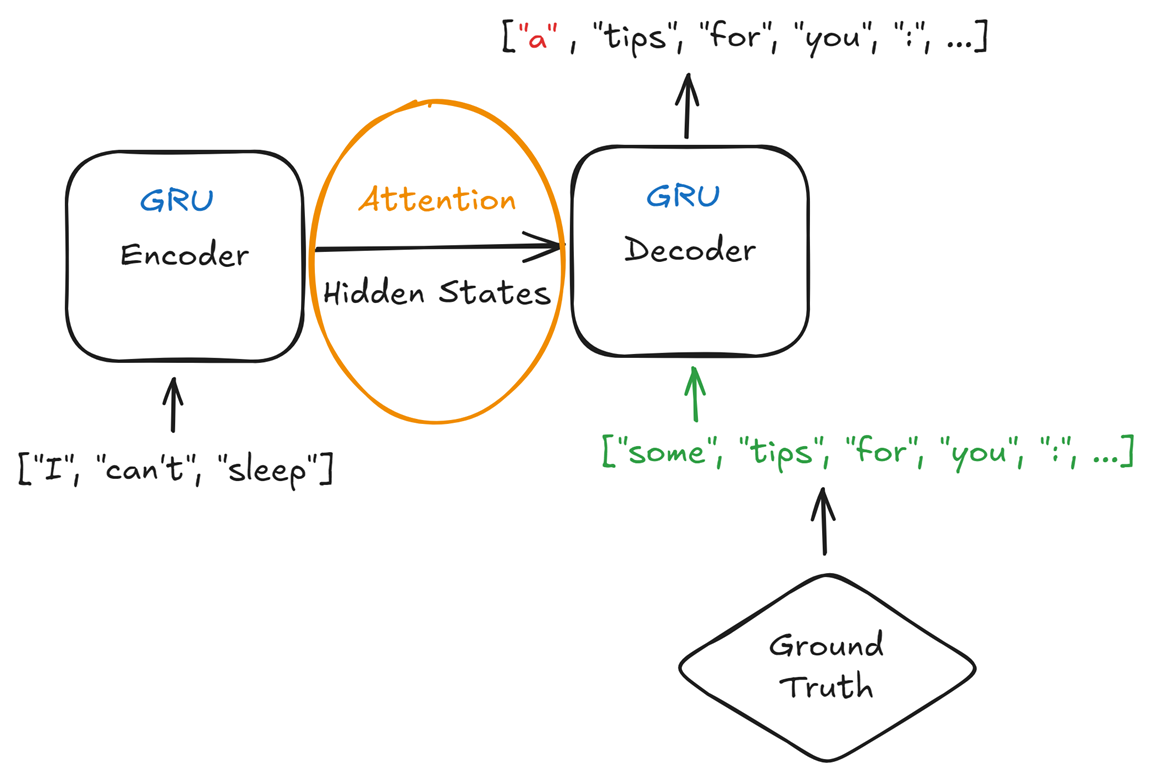

## Training

The widely used optimizer `adam` is an algorithm to adjust the weights of the neural network. It combines the best properties of two other methods: AdaGrad and RMSProp. Adam uses the running averages of both the gradients and their squares to adapt the learning rate for each parameter.

In [39]:
optimizer = optim.Adam(model.parameters())

Seq2seq models use cross-entropy loss because it measures the difference between the predicted probability distribution and the actual distribution, suiting sequence prediction tasks.

In [40]:
criterion = nn.CrossEntropyLoss(ignore_index=pad_index)

In [41]:
def train_fn(
    model, data_loader, optimizer, criterion, clip, teacher_forcing_ratio, device
):
    model.train()
    epoch_loss = 0
    for i, batch in enumerate(data_loader):
        src = batch["n_Questions"].to(device)
        trg = batch["n_Answers"].to(device)
        optimizer.zero_grad()
        output = model(src, trg, teacher_forcing_ratio)
        output_dim = output.shape[-1]
        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)
        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [42]:
def evaluate_fn(model, data_loader, criterion, device):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            src = batch["n_Questions"].to(device)
            trg = batch["n_Answers"].to(device)
            output = model(src, trg, 0) # turn off teacher forcing
            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)
            loss = criterion(output, trg)
            epoch_loss += loss.item()
    return epoch_loss / len(data_loader)

In [43]:
n_epochs = 200
clip = 1.0
teacher_forcing_ratio = 0.7 # 50 percent change of using teacher forcing at each time step

training_losses = []
validation_losses = []

for epoch in tqdm.tqdm(range(n_epochs)):
    train_loss = train_fn(
        model,
        train_data_loader,
        optimizer,
        criterion,
        clip,
        teacher_forcing_ratio,
        device,
    )
    valid_loss = evaluate_fn(
        model,
        val_data_loader,
        criterion,
        device,
    )

    training_losses.append(train_loss)
    validation_losses.append(valid_loss)

    if (epoch % 10 == 0): # save the model at every 10th iteration
        torch.save(model, "tut2-model.pth")
    print(f"\tTrain Loss: {train_loss:7.3f} | Train PPL: {np.exp(train_loss):7.3f}")
    print(f"\tValid Loss: {valid_loss:7.3f} | Valid PPL: {np.exp(valid_loss):7.3f}")

  0%|          | 1/200 [00:13<44:34, 13.44s/it]

	Train Loss:   6.881 | Train PPL: 973.933
	Valid Loss:   6.293 | Valid PPL: 540.694


  1%|          | 2/200 [00:25<41:52, 12.69s/it]

	Train Loss:   5.884 | Train PPL: 359.078
	Valid Loss:   5.387 | Valid PPL: 218.506


  2%|▏         | 3/200 [00:37<40:45, 12.41s/it]

	Train Loss:   5.672 | Train PPL: 290.665
	Valid Loss:   5.299 | Valid PPL: 200.062


  2%|▏         | 4/200 [00:50<40:37, 12.44s/it]

	Train Loss:   5.589 | Train PPL: 267.494
	Valid Loss:   5.270 | Valid PPL: 194.449


  2%|▎         | 5/200 [01:02<39:43, 12.22s/it]

	Train Loss:   5.557 | Train PPL: 259.042
	Valid Loss:   5.329 | Valid PPL: 206.269


  3%|▎         | 6/200 [01:14<39:22, 12.18s/it]

	Train Loss:   5.533 | Train PPL: 252.781
	Valid Loss:   5.272 | Valid PPL: 194.829


  4%|▎         | 7/200 [01:25<38:08, 11.86s/it]

	Train Loss:   5.470 | Train PPL: 237.400
	Valid Loss:   5.298 | Valid PPL: 200.022


  4%|▍         | 8/200 [01:37<38:35, 12.06s/it]

	Train Loss:   5.505 | Train PPL: 245.993
	Valid Loss:   5.265 | Valid PPL: 193.422


  4%|▍         | 9/200 [01:48<37:26, 11.76s/it]

	Train Loss:   5.508 | Train PPL: 246.546
	Valid Loss:   5.239 | Valid PPL: 188.532


  5%|▌         | 10/200 [02:01<38:03, 12.02s/it]

	Train Loss:   5.478 | Train PPL: 239.302
	Valid Loss:   5.274 | Valid PPL: 195.203


  6%|▌         | 11/200 [02:13<38:10, 12.12s/it]

	Train Loss:   5.444 | Train PPL: 231.260
	Valid Loss:   5.282 | Valid PPL: 196.677


  6%|▌         | 12/200 [02:26<38:17, 12.22s/it]

	Train Loss:   5.412 | Train PPL: 223.991
	Valid Loss:   5.289 | Valid PPL: 198.193


  6%|▋         | 13/200 [02:37<37:02, 11.88s/it]

	Train Loss:   5.404 | Train PPL: 222.262
	Valid Loss:   5.263 | Valid PPL: 193.042


  7%|▋         | 14/200 [02:49<36:59, 11.93s/it]

	Train Loss:   5.380 | Train PPL: 216.977
	Valid Loss:   5.274 | Valid PPL: 195.124


  8%|▊         | 15/200 [03:01<36:48, 11.94s/it]

	Train Loss:   5.328 | Train PPL: 206.090
	Valid Loss:   5.285 | Valid PPL: 197.256


  8%|▊         | 16/200 [03:13<36:34, 11.93s/it]

	Train Loss:   5.291 | Train PPL: 198.599
	Valid Loss:   5.323 | Valid PPL: 204.924


  8%|▊         | 17/200 [03:24<35:53, 11.77s/it]

	Train Loss:   5.219 | Train PPL: 184.801
	Valid Loss:   5.348 | Valid PPL: 210.232


  9%|▉         | 18/200 [03:36<35:54, 11.84s/it]

	Train Loss:   5.151 | Train PPL: 172.569
	Valid Loss:   5.304 | Valid PPL: 201.210


 10%|▉         | 19/200 [03:49<36:12, 12.00s/it]

	Train Loss:   5.091 | Train PPL: 162.549
	Valid Loss:   5.353 | Valid PPL: 211.207


 10%|█         | 20/200 [04:01<36:22, 12.13s/it]

	Train Loss:   5.352 | Train PPL: 210.984
	Valid Loss:   5.385 | Valid PPL: 218.193


 10%|█         | 21/200 [04:13<36:11, 12.13s/it]

	Train Loss:   4.978 | Train PPL: 145.118
	Valid Loss:   5.371 | Valid PPL: 215.164


 11%|█         | 22/200 [04:26<36:22, 12.26s/it]

	Train Loss:   4.942 | Train PPL: 140.118
	Valid Loss:   5.374 | Valid PPL: 215.830


 12%|█▏        | 23/200 [04:37<35:28, 12.03s/it]

	Train Loss:   4.898 | Train PPL: 134.027
	Valid Loss:   5.349 | Valid PPL: 210.414


 12%|█▏        | 24/200 [04:49<35:05, 11.96s/it]

	Train Loss:   4.802 | Train PPL: 121.730
	Valid Loss:   5.386 | Valid PPL: 218.275


 12%|█▎        | 25/200 [05:01<34:40, 11.89s/it]

	Train Loss:   4.823 | Train PPL: 124.283
	Valid Loss:   5.405 | Valid PPL: 222.414


 13%|█▎        | 26/200 [05:13<34:28, 11.89s/it]

	Train Loss:   4.771 | Train PPL: 118.077
	Valid Loss:   5.334 | Valid PPL: 207.304


 14%|█▎        | 27/200 [05:24<33:51, 11.74s/it]

	Train Loss:   4.664 | Train PPL: 106.008
	Valid Loss:   5.459 | Valid PPL: 234.874


 14%|█▍        | 28/200 [05:36<33:47, 11.79s/it]

	Train Loss:   4.650 | Train PPL: 104.635
	Valid Loss:   5.460 | Valid PPL: 235.129


 14%|█▍        | 29/200 [05:48<33:56, 11.91s/it]

	Train Loss:   4.625 | Train PPL: 102.046
	Valid Loss:   5.369 | Valid PPL: 214.543


 15%|█▌        | 30/200 [06:00<34:00, 12.00s/it]

	Train Loss:   4.576 | Train PPL:  97.115
	Valid Loss:   5.469 | Valid PPL: 237.196


 16%|█▌        | 31/200 [06:12<33:55, 12.04s/it]

	Train Loss:   4.506 | Train PPL:  90.519
	Valid Loss:   5.357 | Valid PPL: 212.082


 16%|█▌        | 32/200 [06:25<34:14, 12.23s/it]

	Train Loss:   4.576 | Train PPL:  97.088
	Valid Loss:   5.514 | Valid PPL: 248.178


 16%|█▋        | 33/200 [06:37<34:09, 12.27s/it]

	Train Loss:   4.439 | Train PPL:  84.730
	Valid Loss:   5.442 | Valid PPL: 230.935


 17%|█▋        | 34/200 [06:50<34:14, 12.37s/it]

	Train Loss:   4.439 | Train PPL:  84.723
	Valid Loss:   5.397 | Valid PPL: 220.671


 18%|█▊        | 35/200 [07:03<34:07, 12.41s/it]

	Train Loss:   4.424 | Train PPL:  83.424
	Valid Loss:   5.459 | Valid PPL: 234.861


 18%|█▊        | 36/200 [07:14<33:06, 12.11s/it]

	Train Loss:   4.347 | Train PPL:  77.249
	Valid Loss:   5.393 | Valid PPL: 219.797


 18%|█▊        | 37/200 [07:26<33:12, 12.23s/it]

	Train Loss:   4.308 | Train PPL:  74.318
	Valid Loss:   5.446 | Valid PPL: 231.835


 19%|█▉        | 38/200 [07:39<33:38, 12.46s/it]

	Train Loss:   4.262 | Train PPL:  70.971
	Valid Loss:   5.414 | Valid PPL: 224.628


 20%|█▉        | 39/200 [07:52<33:42, 12.56s/it]

	Train Loss:   4.278 | Train PPL:  72.118
	Valid Loss:   5.420 | Valid PPL: 225.985


 20%|██        | 40/200 [08:04<32:40, 12.25s/it]

	Train Loss:   4.178 | Train PPL:  65.249
	Valid Loss:   5.763 | Valid PPL: 318.246


 20%|██        | 41/200 [08:15<31:53, 12.03s/it]

	Train Loss:   4.179 | Train PPL:  65.273
	Valid Loss:   5.390 | Valid PPL: 219.213


 21%|██        | 42/200 [08:27<31:33, 11.98s/it]

	Train Loss:   4.153 | Train PPL:  63.597
	Valid Loss:   5.410 | Valid PPL: 223.573


 22%|██▏       | 43/200 [08:40<32:09, 12.29s/it]

	Train Loss:   4.133 | Train PPL:  62.367
	Valid Loss:   5.541 | Valid PPL: 254.995


 22%|██▏       | 44/200 [08:51<30:37, 11.78s/it]

	Train Loss:   3.998 | Train PPL:  54.486
	Valid Loss:   5.422 | Valid PPL: 226.358


 22%|██▎       | 45/200 [09:03<30:59, 12.00s/it]

	Train Loss:   4.052 | Train PPL:  57.486
	Valid Loss:   5.503 | Valid PPL: 245.525


 23%|██▎       | 46/200 [09:15<30:51, 12.03s/it]

	Train Loss:   4.089 | Train PPL:  59.700
	Valid Loss:   5.529 | Valid PPL: 251.799


 24%|██▎       | 47/200 [09:28<30:47, 12.08s/it]

	Train Loss:   3.925 | Train PPL:  50.659
	Valid Loss:   5.575 | Valid PPL: 263.640


 24%|██▍       | 48/200 [09:39<30:09, 11.90s/it]

	Train Loss:   3.904 | Train PPL:  49.583
	Valid Loss:   5.612 | Valid PPL: 273.608


 24%|██▍       | 49/200 [09:51<30:16, 12.03s/it]

	Train Loss:   3.895 | Train PPL:  49.174
	Valid Loss:   5.473 | Valid PPL: 238.219


 25%|██▌       | 50/200 [10:03<30:02, 12.01s/it]

	Train Loss:   3.829 | Train PPL:  46.000
	Valid Loss:   5.424 | Valid PPL: 226.840


 26%|██▌       | 51/200 [10:15<29:51, 12.02s/it]

	Train Loss:   3.910 | Train PPL:  49.898
	Valid Loss:   5.497 | Valid PPL: 243.876


 26%|██▌       | 52/200 [10:28<29:45, 12.06s/it]

	Train Loss:   3.835 | Train PPL:  46.286
	Valid Loss:   5.458 | Valid PPL: 234.637


 26%|██▋       | 53/200 [10:40<30:01, 12.25s/it]

	Train Loss:   3.685 | Train PPL:  39.865
	Valid Loss:   5.458 | Valid PPL: 234.640


 27%|██▋       | 54/200 [10:53<29:53, 12.28s/it]

	Train Loss:   3.771 | Train PPL:  43.439
	Valid Loss:   5.487 | Valid PPL: 241.425


 28%|██▊       | 55/200 [11:04<29:18, 12.13s/it]

	Train Loss:   3.779 | Train PPL:  43.753
	Valid Loss:   5.466 | Valid PPL: 236.429


 28%|██▊       | 56/200 [11:17<29:39, 12.36s/it]

	Train Loss:   3.705 | Train PPL:  40.641
	Valid Loss:   5.516 | Valid PPL: 248.578


 28%|██▊       | 57/200 [11:29<29:02, 12.19s/it]

	Train Loss:   3.662 | Train PPL:  38.922
	Valid Loss:   5.486 | Valid PPL: 241.270


 29%|██▉       | 58/200 [11:41<28:22, 11.99s/it]

	Train Loss:   3.649 | Train PPL:  38.449
	Valid Loss:   5.510 | Valid PPL: 247.269


 30%|██▉       | 59/200 [11:52<27:50, 11.85s/it]

	Train Loss:   3.601 | Train PPL:  36.652
	Valid Loss:   5.497 | Valid PPL: 243.924


 30%|███       | 60/200 [12:03<27:17, 11.70s/it]

	Train Loss:   3.646 | Train PPL:  38.334
	Valid Loss:   5.478 | Valid PPL: 239.450


 30%|███       | 61/200 [12:15<27:07, 11.71s/it]

	Train Loss:   3.553 | Train PPL:  34.932
	Valid Loss:   5.573 | Valid PPL: 263.119


 31%|███       | 62/200 [12:27<27:06, 11.79s/it]

	Train Loss:   3.575 | Train PPL:  35.684
	Valid Loss:   5.644 | Valid PPL: 282.544


 32%|███▏      | 63/200 [12:39<26:51, 11.76s/it]

	Train Loss:   3.516 | Train PPL:  33.657
	Valid Loss:   5.588 | Valid PPL: 267.286


 32%|███▏      | 64/200 [12:50<26:00, 11.48s/it]

	Train Loss:   3.543 | Train PPL:  34.576
	Valid Loss:   5.538 | Valid PPL: 254.161


 32%|███▎      | 65/200 [13:01<25:58, 11.54s/it]

	Train Loss:   3.523 | Train PPL:  33.891
	Valid Loss:   5.628 | Valid PPL: 278.236


 33%|███▎      | 66/200 [13:13<25:53, 11.59s/it]

	Train Loss:   3.428 | Train PPL:  30.807
	Valid Loss:   5.650 | Valid PPL: 284.316


 34%|███▎      | 67/200 [13:25<25:49, 11.65s/it]

	Train Loss:   3.429 | Train PPL:  30.837
	Valid Loss:   5.728 | Valid PPL: 307.415


 34%|███▍      | 68/200 [13:36<25:12, 11.45s/it]

	Train Loss:   3.437 | Train PPL:  31.082
	Valid Loss:   5.694 | Valid PPL: 297.180


 34%|███▍      | 69/200 [13:48<25:35, 11.72s/it]

	Train Loss:   3.408 | Train PPL:  30.201
	Valid Loss:   5.724 | Valid PPL: 306.185


 35%|███▌      | 70/200 [13:59<24:58, 11.53s/it]

	Train Loss:   3.336 | Train PPL:  28.098
	Valid Loss:   5.694 | Valid PPL: 297.029


 36%|███▌      | 71/200 [14:12<25:18, 11.77s/it]

	Train Loss:   3.355 | Train PPL:  28.644
	Valid Loss:   6.000 | Valid PPL: 403.259


 36%|███▌      | 72/200 [14:24<25:10, 11.80s/it]

	Train Loss:   3.283 | Train PPL:  26.665
	Valid Loss:   5.872 | Valid PPL: 355.084


 36%|███▋      | 73/200 [14:36<25:12, 11.91s/it]

	Train Loss:   3.335 | Train PPL:  28.082
	Valid Loss:   5.685 | Valid PPL: 294.543


 37%|███▋      | 74/200 [14:48<25:12, 12.01s/it]

	Train Loss:   3.224 | Train PPL:  25.131
	Valid Loss:   5.774 | Valid PPL: 321.862


 38%|███▊      | 75/200 [15:01<25:30, 12.24s/it]

	Train Loss:   3.251 | Train PPL:  25.821
	Valid Loss:   5.810 | Valid PPL: 333.716


 38%|███▊      | 76/200 [15:12<24:46, 11.99s/it]

	Train Loss:   3.233 | Train PPL:  25.363
	Valid Loss:   5.727 | Valid PPL: 307.014


 38%|███▊      | 77/200 [15:25<24:53, 12.14s/it]

	Train Loss:   3.158 | Train PPL:  23.530
	Valid Loss:   5.870 | Valid PPL: 354.118


 39%|███▉      | 78/200 [15:37<24:54, 12.25s/it]

	Train Loss:   3.118 | Train PPL:  22.600
	Valid Loss:   6.247 | Valid PPL: 516.682


 40%|███▉      | 79/200 [15:49<24:18, 12.05s/it]

	Train Loss:   3.032 | Train PPL:  20.740
	Valid Loss:   5.808 | Valid PPL: 332.933


 40%|████      | 80/200 [16:00<23:53, 11.95s/it]

	Train Loss:   3.143 | Train PPL:  23.178
	Valid Loss:   5.795 | Valid PPL: 328.620


 40%|████      | 81/200 [16:14<24:24, 12.30s/it]

	Train Loss:   3.128 | Train PPL:  22.833
	Valid Loss:   5.926 | Valid PPL: 374.466


 41%|████      | 82/200 [16:26<24:33, 12.49s/it]

	Train Loss:   3.073 | Train PPL:  21.608
	Valid Loss:   5.810 | Valid PPL: 333.613


 42%|████▏     | 83/200 [16:38<23:48, 12.21s/it]

	Train Loss:   2.930 | Train PPL:  18.735
	Valid Loss:   5.916 | Valid PPL: 371.020


 42%|████▏     | 84/200 [16:48<22:29, 11.64s/it]

	Train Loss:   2.989 | Train PPL:  19.873
	Valid Loss:   6.349 | Valid PPL: 572.117


 42%|████▎     | 85/200 [16:59<21:56, 11.45s/it]

	Train Loss:   2.867 | Train PPL:  17.588
	Valid Loss:   5.991 | Valid PPL: 399.618


 43%|████▎     | 86/200 [17:11<21:40, 11.40s/it]

	Train Loss:   2.929 | Train PPL:  18.711
	Valid Loss:   6.018 | Valid PPL: 410.570


 44%|████▎     | 87/200 [17:23<22:08, 11.76s/it]

	Train Loss:   2.972 | Train PPL:  19.540
	Valid Loss:   6.033 | Valid PPL: 416.919


 44%|████▍     | 88/200 [17:35<22:12, 11.89s/it]

	Train Loss:   3.030 | Train PPL:  20.702
	Valid Loss:   6.391 | Valid PPL: 596.381


 44%|████▍     | 89/200 [17:47<21:43, 11.75s/it]

	Train Loss:   2.806 | Train PPL:  16.540
	Valid Loss:   6.675 | Valid PPL: 792.740


 45%|████▌     | 90/200 [17:59<21:59, 12.00s/it]

	Train Loss:   2.915 | Train PPL:  18.449
	Valid Loss:   7.082 | Valid PPL: 1190.533


 46%|████▌     | 91/200 [18:12<22:08, 12.19s/it]

	Train Loss:   2.803 | Train PPL:  16.498
	Valid Loss:   6.164 | Valid PPL: 475.148


 46%|████▌     | 92/200 [18:25<22:21, 12.42s/it]

	Train Loss:   2.907 | Train PPL:  18.298
	Valid Loss:   6.007 | Valid PPL: 406.232


 46%|████▋     | 93/200 [18:37<22:02, 12.36s/it]

	Train Loss:   2.908 | Train PPL:  18.317
	Valid Loss:   6.486 | Valid PPL: 655.946


 47%|████▋     | 94/200 [18:49<21:30, 12.18s/it]

	Train Loss:   2.866 | Train PPL:  17.573
	Valid Loss:   6.094 | Valid PPL: 443.068


 48%|████▊     | 95/200 [19:02<21:36, 12.35s/it]

	Train Loss:   2.802 | Train PPL:  16.474
	Valid Loss:   6.211 | Valid PPL: 498.236


 48%|████▊     | 96/200 [19:14<21:18, 12.30s/it]

	Train Loss:   2.842 | Train PPL:  17.158
	Valid Loss:   6.273 | Valid PPL: 529.817


 48%|████▊     | 97/200 [19:26<21:00, 12.24s/it]

	Train Loss:   2.839 | Train PPL:  17.094
	Valid Loss:   6.423 | Valid PPL: 615.691


 49%|████▉     | 98/200 [19:39<20:59, 12.35s/it]

	Train Loss:   2.786 | Train PPL:  16.215
	Valid Loss:   7.006 | Valid PPL: 1103.056


 50%|████▉     | 99/200 [19:50<20:18, 12.07s/it]

	Train Loss:   2.679 | Train PPL:  14.568
	Valid Loss:   6.417 | Valid PPL: 612.129


 50%|█████     | 100/200 [20:02<19:52, 11.93s/it]

	Train Loss:   2.701 | Train PPL:  14.902
	Valid Loss:   6.960 | Valid PPL: 1054.118


 50%|█████     | 101/200 [20:14<19:52, 12.05s/it]

	Train Loss:   2.695 | Train PPL:  14.806
	Valid Loss:   6.573 | Valid PPL: 715.557


 51%|█████     | 102/200 [20:26<19:41, 12.05s/it]

	Train Loss:   2.696 | Train PPL:  14.817
	Valid Loss:   6.517 | Valid PPL: 676.849


 52%|█████▏    | 103/200 [20:38<19:38, 12.14s/it]

	Train Loss:   2.654 | Train PPL:  14.215
	Valid Loss:   6.596 | Valid PPL: 731.836


 52%|█████▏    | 104/200 [20:50<19:12, 12.00s/it]

	Train Loss:   2.515 | Train PPL:  12.367
	Valid Loss:   6.640 | Valid PPL: 764.963


 52%|█████▎    | 105/200 [21:03<19:27, 12.29s/it]

	Train Loss:   2.553 | Train PPL:  12.850
	Valid Loss:   6.655 | Valid PPL: 776.756


 53%|█████▎    | 106/200 [21:15<19:13, 12.27s/it]

	Train Loss:   2.537 | Train PPL:  12.640
	Valid Loss:   6.869 | Valid PPL: 961.533


 54%|█████▎    | 107/200 [21:27<18:50, 12.16s/it]

	Train Loss:   2.536 | Train PPL:  12.631
	Valid Loss:   6.719 | Valid PPL: 827.655


 54%|█████▍    | 108/200 [21:39<18:30, 12.07s/it]

	Train Loss:   2.636 | Train PPL:  13.960
	Valid Loss:   7.080 | Valid PPL: 1188.328


 55%|█████▍    | 109/200 [21:51<18:19, 12.09s/it]

	Train Loss:   2.486 | Train PPL:  12.012
	Valid Loss:   6.794 | Valid PPL: 892.801


 55%|█████▌    | 110/200 [22:02<17:46, 11.85s/it]

	Train Loss:   2.366 | Train PPL:  10.650
	Valid Loss:   6.904 | Valid PPL: 996.148


 56%|█████▌    | 111/200 [22:15<17:47, 12.00s/it]

	Train Loss:   2.586 | Train PPL:  13.273
	Valid Loss:   6.876 | Valid PPL: 968.388


 56%|█████▌    | 112/200 [22:27<17:48, 12.14s/it]

	Train Loss:   2.419 | Train PPL:  11.238
	Valid Loss:   6.699 | Valid PPL: 811.293


 56%|█████▋    | 113/200 [22:39<17:37, 12.15s/it]

	Train Loss:   2.501 | Train PPL:  12.199
	Valid Loss:   6.712 | Valid PPL: 822.474


 57%|█████▋    | 114/200 [22:52<17:34, 12.26s/it]

	Train Loss:   2.507 | Train PPL:  12.271
	Valid Loss:   6.750 | Valid PPL: 854.110


 57%|█████▊    | 115/200 [23:04<17:25, 12.29s/it]

	Train Loss:   2.478 | Train PPL:  11.922
	Valid Loss:   6.763 | Valid PPL: 865.375


 58%|█████▊    | 116/200 [23:16<16:48, 12.00s/it]

	Train Loss:   2.376 | Train PPL:  10.767
	Valid Loss:   6.702 | Valid PPL: 813.705


 58%|█████▊    | 117/200 [23:27<16:30, 11.94s/it]

	Train Loss:   2.435 | Train PPL:  11.420
	Valid Loss:   6.962 | Valid PPL: 1055.491


 59%|█████▉    | 118/200 [23:39<16:08, 11.81s/it]

	Train Loss:   2.361 | Train PPL:  10.600
	Valid Loss:   7.170 | Valid PPL: 1299.290


 60%|█████▉    | 119/200 [23:50<15:41, 11.62s/it]

	Train Loss:   2.258 | Train PPL:   9.565
	Valid Loss:   6.768 | Valid PPL: 869.815


 60%|██████    | 120/200 [24:02<15:41, 11.77s/it]

	Train Loss:   2.451 | Train PPL:  11.604
	Valid Loss:   6.852 | Valid PPL: 945.516


 60%|██████    | 121/200 [24:15<15:45, 11.97s/it]

	Train Loss:   2.386 | Train PPL:  10.874
	Valid Loss:   6.960 | Valid PPL: 1053.577


 61%|██████    | 122/200 [24:27<15:44, 12.11s/it]

	Train Loss:   2.305 | Train PPL:  10.019
	Valid Loss:   7.154 | Valid PPL: 1279.102


 62%|██████▏   | 123/200 [24:39<15:21, 11.96s/it]

	Train Loss:   2.338 | Train PPL:  10.363
	Valid Loss:   7.161 | Valid PPL: 1288.829


 62%|██████▏   | 124/200 [24:51<15:12, 12.00s/it]

	Train Loss:   2.320 | Train PPL:  10.175
	Valid Loss:   7.067 | Valid PPL: 1172.131


 62%|██████▎   | 125/200 [25:03<15:02, 12.03s/it]

	Train Loss:   2.273 | Train PPL:   9.709
	Valid Loss:   7.111 | Valid PPL: 1225.320


 63%|██████▎   | 126/200 [25:15<14:44, 11.95s/it]

	Train Loss:   2.262 | Train PPL:   9.606
	Valid Loss:   7.256 | Valid PPL: 1416.389


 64%|██████▎   | 127/200 [25:27<14:32, 11.95s/it]

	Train Loss:   2.276 | Train PPL:   9.736
	Valid Loss:   6.857 | Valid PPL: 950.243


 64%|██████▍   | 128/200 [25:38<14:14, 11.87s/it]

	Train Loss:   2.196 | Train PPL:   8.987
	Valid Loss:   7.099 | Valid PPL: 1211.197


 64%|██████▍   | 129/200 [25:51<14:11, 12.00s/it]

	Train Loss:   2.204 | Train PPL:   9.058
	Valid Loss:   7.110 | Valid PPL: 1224.352


 65%|██████▌   | 130/200 [26:01<13:34, 11.64s/it]

	Train Loss:   1.943 | Train PPL:   6.978
	Valid Loss:   7.539 | Valid PPL: 1880.662


 66%|██████▌   | 131/200 [26:12<13:06, 11.40s/it]

	Train Loss:   2.212 | Train PPL:   9.130
	Valid Loss:   7.336 | Valid PPL: 1534.954


 66%|██████▌   | 132/200 [26:24<13:02, 11.51s/it]

	Train Loss:   2.153 | Train PPL:   8.611
	Valid Loss:   7.468 | Valid PPL: 1751.716


 66%|██████▋   | 133/200 [26:36<13:05, 11.72s/it]

	Train Loss:   2.277 | Train PPL:   9.749
	Valid Loss:   7.252 | Valid PPL: 1411.424


 67%|██████▋   | 134/200 [26:47<12:42, 11.55s/it]

	Train Loss:   2.176 | Train PPL:   8.812
	Valid Loss:   7.188 | Valid PPL: 1322.825


 68%|██████▊   | 135/200 [26:59<12:41, 11.71s/it]

	Train Loss:   2.172 | Train PPL:   8.773
	Valid Loss:   6.988 | Valid PPL: 1083.756


 68%|██████▊   | 136/200 [27:11<12:26, 11.66s/it]

	Train Loss:   2.136 | Train PPL:   8.470
	Valid Loss:   7.168 | Valid PPL: 1297.232


 68%|██████▊   | 137/200 [27:24<12:39, 12.06s/it]

	Train Loss:   2.111 | Train PPL:   8.257
	Valid Loss:   7.115 | Valid PPL: 1230.211


 69%|██████▉   | 138/200 [27:35<12:12, 11.82s/it]

	Train Loss:   1.988 | Train PPL:   7.304
	Valid Loss:   7.147 | Valid PPL: 1269.688


 70%|██████▉   | 139/200 [27:47<12:07, 11.92s/it]

	Train Loss:   2.054 | Train PPL:   7.795
	Valid Loss:   7.357 | Valid PPL: 1567.005


 70%|███████   | 140/200 [28:00<12:04, 12.07s/it]

	Train Loss:   2.128 | Train PPL:   8.396
	Valid Loss:   7.264 | Valid PPL: 1427.755


 70%|███████   | 141/200 [28:12<11:51, 12.06s/it]

	Train Loss:   2.035 | Train PPL:   7.655
	Valid Loss:   7.321 | Valid PPL: 1511.869


 71%|███████   | 142/200 [28:23<11:28, 11.88s/it]

	Train Loss:   2.108 | Train PPL:   8.229
	Valid Loss:   7.295 | Valid PPL: 1473.135


 72%|███████▏  | 143/200 [28:36<11:29, 12.09s/it]

	Train Loss:   2.019 | Train PPL:   7.532
	Valid Loss:   7.358 | Valid PPL: 1568.259


 72%|███████▏  | 144/200 [28:48<11:12, 12.01s/it]

	Train Loss:   2.015 | Train PPL:   7.502
	Valid Loss:   7.458 | Valid PPL: 1733.508


 72%|███████▎  | 145/200 [29:00<11:05, 12.09s/it]

	Train Loss:   1.954 | Train PPL:   7.056
	Valid Loss:   7.366 | Valid PPL: 1580.820


 73%|███████▎  | 146/200 [29:12<10:45, 11.95s/it]

	Train Loss:   2.035 | Train PPL:   7.653
	Valid Loss:   7.298 | Valid PPL: 1477.546


 74%|███████▎  | 147/200 [29:24<10:35, 11.99s/it]

	Train Loss:   1.866 | Train PPL:   6.460
	Valid Loss:   7.392 | Valid PPL: 1623.040


 74%|███████▍  | 148/200 [29:36<10:34, 12.21s/it]

	Train Loss:   1.955 | Train PPL:   7.061
	Valid Loss:   7.375 | Valid PPL: 1595.792


 74%|███████▍  | 149/200 [29:48<10:09, 11.96s/it]

	Train Loss:   1.910 | Train PPL:   6.756
	Valid Loss:   7.762 | Valid PPL: 2348.736


 75%|███████▌  | 150/200 [29:59<09:51, 11.82s/it]

	Train Loss:   1.990 | Train PPL:   7.314
	Valid Loss:   7.739 | Valid PPL: 2296.020


 76%|███████▌  | 151/200 [30:11<09:41, 11.86s/it]

	Train Loss:   1.889 | Train PPL:   6.610
	Valid Loss:   7.833 | Valid PPL: 2523.036


 76%|███████▌  | 152/200 [30:23<09:27, 11.83s/it]

	Train Loss:   2.024 | Train PPL:   7.569
	Valid Loss:   7.702 | Valid PPL: 2212.357


 76%|███████▋  | 153/200 [30:36<09:26, 12.06s/it]

	Train Loss:   1.851 | Train PPL:   6.366
	Valid Loss:   7.372 | Valid PPL: 1590.707


 77%|███████▋  | 154/200 [30:48<09:19, 12.17s/it]

	Train Loss:   1.922 | Train PPL:   6.836
	Valid Loss:   7.502 | Valid PPL: 1811.968


 78%|███████▊  | 155/200 [30:59<08:46, 11.69s/it]

	Train Loss:   1.748 | Train PPL:   5.745
	Valid Loss:   7.413 | Valid PPL: 1656.627


 78%|███████▊  | 156/200 [31:10<08:29, 11.57s/it]

	Train Loss:   1.881 | Train PPL:   6.562
	Valid Loss:   7.491 | Valid PPL: 1791.455


 78%|███████▊  | 157/200 [31:22<08:24, 11.74s/it]

	Train Loss:   1.692 | Train PPL:   5.432
	Valid Loss:   7.475 | Valid PPL: 1764.040


 79%|███████▉  | 158/200 [31:35<08:29, 12.14s/it]

	Train Loss:   1.839 | Train PPL:   6.292
	Valid Loss:   7.719 | Valid PPL: 2251.134


 80%|███████▉  | 159/200 [31:48<08:24, 12.31s/it]

	Train Loss:   1.830 | Train PPL:   6.233
	Valid Loss:   7.860 | Valid PPL: 2591.374


 80%|████████  | 160/200 [32:01<08:18, 12.47s/it]

	Train Loss:   1.858 | Train PPL:   6.412
	Valid Loss:   7.324 | Valid PPL: 1516.500


 80%|████████  | 161/200 [32:13<08:06, 12.48s/it]

	Train Loss:   1.754 | Train PPL:   5.776
	Valid Loss:   7.715 | Valid PPL: 2240.886


 81%|████████  | 162/200 [32:25<07:51, 12.41s/it]

	Train Loss:   1.751 | Train PPL:   5.758
	Valid Loss:   7.877 | Valid PPL: 2636.957


 82%|████████▏ | 163/200 [32:37<07:26, 12.08s/it]

	Train Loss:   1.566 | Train PPL:   4.785
	Valid Loss:   7.694 | Valid PPL: 2194.452


 82%|████████▏ | 164/200 [32:49<07:13, 12.05s/it]

	Train Loss:   1.601 | Train PPL:   4.957
	Valid Loss:   7.783 | Valid PPL: 2399.422


 82%|████████▎ | 165/200 [33:01<07:04, 12.13s/it]

	Train Loss:   1.698 | Train PPL:   5.465
	Valid Loss:   7.536 | Valid PPL: 1874.724


 83%|████████▎ | 166/200 [33:14<06:57, 12.27s/it]

	Train Loss:   1.663 | Train PPL:   5.274
	Valid Loss:   7.714 | Valid PPL: 2240.251


 84%|████████▎ | 167/200 [33:26<06:42, 12.19s/it]

	Train Loss:   1.652 | Train PPL:   5.216
	Valid Loss:   7.591 | Valid PPL: 1979.624


 84%|████████▍ | 168/200 [33:37<06:23, 11.98s/it]

	Train Loss:   1.647 | Train PPL:   5.192
	Valid Loss:   7.600 | Valid PPL: 1998.007


 84%|████████▍ | 169/200 [33:50<06:16, 12.14s/it]

	Train Loss:   1.712 | Train PPL:   5.540
	Valid Loss:   7.862 | Valid PPL: 2595.723


 85%|████████▌ | 170/200 [34:01<06:00, 12.03s/it]

	Train Loss:   1.712 | Train PPL:   5.541
	Valid Loss:   7.590 | Valid PPL: 1978.532


 86%|████████▌ | 171/200 [34:13<05:49, 12.04s/it]

	Train Loss:   1.567 | Train PPL:   4.791
	Valid Loss:   7.855 | Valid PPL: 2579.321


 86%|████████▌ | 172/200 [34:26<05:40, 12.16s/it]

	Train Loss:   1.659 | Train PPL:   5.255
	Valid Loss:   7.912 | Valid PPL: 2730.418


 86%|████████▋ | 173/200 [34:37<05:22, 11.94s/it]

	Train Loss:   1.657 | Train PPL:   5.244
	Valid Loss:   8.120 | Valid PPL: 3360.405


 87%|████████▋ | 174/200 [34:49<05:11, 11.98s/it]

	Train Loss:   1.501 | Train PPL:   4.484
	Valid Loss:   8.001 | Valid PPL: 2983.227


 88%|████████▊ | 175/200 [35:01<04:56, 11.87s/it]

	Train Loss:   1.741 | Train PPL:   5.701
	Valid Loss:   7.846 | Valid PPL: 2556.163


 88%|████████▊ | 176/200 [35:12<04:41, 11.73s/it]

	Train Loss:   1.685 | Train PPL:   5.394
	Valid Loss:   7.637 | Valid PPL: 2074.247


 88%|████████▊ | 177/200 [35:24<04:32, 11.84s/it]

	Train Loss:   1.454 | Train PPL:   4.278
	Valid Loss:   7.618 | Valid PPL: 2033.522


 89%|████████▉ | 178/200 [35:36<04:17, 11.71s/it]

	Train Loss:   1.463 | Train PPL:   4.319
	Valid Loss:   7.695 | Valid PPL: 2197.163


 90%|████████▉ | 179/200 [35:48<04:07, 11.76s/it]

	Train Loss:   1.492 | Train PPL:   4.447
	Valid Loss:   7.628 | Valid PPL: 2054.649


 90%|█████████ | 180/200 [36:01<04:01, 12.08s/it]

	Train Loss:   1.532 | Train PPL:   4.626
	Valid Loss:   7.929 | Valid PPL: 2775.268


 90%|█████████ | 181/200 [36:12<03:47, 11.97s/it]

	Train Loss:   1.645 | Train PPL:   5.179
	Valid Loss:   7.715 | Valid PPL: 2241.129


 91%|█████████ | 182/200 [36:24<03:32, 11.78s/it]

	Train Loss:   1.598 | Train PPL:   4.945
	Valid Loss:   8.080 | Valid PPL: 3230.012


 92%|█████████▏| 183/200 [36:36<03:24, 12.04s/it]

	Train Loss:   1.409 | Train PPL:   4.093
	Valid Loss:   8.069 | Valid PPL: 3192.448


 92%|█████████▏| 184/200 [36:48<03:09, 11.81s/it]

	Train Loss:   1.458 | Train PPL:   4.296
	Valid Loss:   7.947 | Valid PPL: 2826.555


 92%|█████████▎| 185/200 [36:59<02:56, 11.78s/it]

	Train Loss:   1.492 | Train PPL:   4.448
	Valid Loss:   7.845 | Valid PPL: 2553.190


 93%|█████████▎| 186/200 [37:11<02:45, 11.79s/it]

	Train Loss:   1.303 | Train PPL:   3.681
	Valid Loss:   7.858 | Valid PPL: 2586.158


 94%|█████████▎| 187/200 [37:22<02:31, 11.65s/it]

	Train Loss:   1.180 | Train PPL:   3.256
	Valid Loss:   7.744 | Valid PPL: 2306.579


 94%|█████████▍| 188/200 [37:35<02:22, 11.86s/it]

	Train Loss:   1.411 | Train PPL:   4.098
	Valid Loss:   7.914 | Valid PPL: 2734.827


 94%|█████████▍| 189/200 [37:47<02:12, 12.02s/it]

	Train Loss:   1.378 | Train PPL:   3.969
	Valid Loss:   8.102 | Valid PPL: 3301.260


 95%|█████████▌| 190/200 [37:59<01:59, 11.93s/it]

	Train Loss:   1.484 | Train PPL:   4.413
	Valid Loss:   7.998 | Valid PPL: 2976.118


 96%|█████████▌| 191/200 [38:11<01:49, 12.11s/it]

	Train Loss:   1.377 | Train PPL:   3.961
	Valid Loss:   8.316 | Valid PPL: 4089.193


 96%|█████████▌| 192/200 [38:23<01:36, 12.09s/it]

	Train Loss:   1.371 | Train PPL:   3.941
	Valid Loss:   8.460 | Valid PPL: 4722.693


 96%|█████████▋| 193/200 [38:36<01:25, 12.16s/it]

	Train Loss:   1.419 | Train PPL:   4.134
	Valid Loss:   8.329 | Valid PPL: 4141.363


 97%|█████████▋| 194/200 [38:48<01:13, 12.32s/it]

	Train Loss:   1.488 | Train PPL:   4.427
	Valid Loss:   7.908 | Valid PPL: 2717.644


 98%|█████████▊| 195/200 [39:00<01:00, 12.05s/it]

	Train Loss:   1.345 | Train PPL:   3.838
	Valid Loss:   8.408 | Valid PPL: 4484.201


 98%|█████████▊| 196/200 [39:11<00:47, 11.91s/it]

	Train Loss:   1.406 | Train PPL:   4.079
	Valid Loss:   8.028 | Valid PPL: 3066.911


 98%|█████████▊| 197/200 [39:24<00:35, 11.97s/it]

	Train Loss:   1.332 | Train PPL:   3.788
	Valid Loss:   8.403 | Valid PPL: 4461.500


 99%|█████████▉| 198/200 [39:36<00:23, 11.98s/it]

	Train Loss:   1.280 | Train PPL:   3.595
	Valid Loss:   8.504 | Valid PPL: 4935.996


100%|█████████▉| 199/200 [39:47<00:11, 11.83s/it]

	Train Loss:   1.409 | Train PPL:   4.091
	Valid Loss:   8.418 | Valid PPL: 4529.857


100%|██████████| 200/200 [40:00<00:00, 12.00s/it]

	Train Loss:   1.276 | Train PPL:   3.584
	Valid Loss:   8.482 | Valid PPL: 4828.155


While the training loss of the model decreases from 7 to 1.2 in 200 epochs, the validation loss first decrease from 6.2 to 5.2, but then starts to increase to over 8 for the remaining training cycles. The model is overfitting: it learns the training data well, but cannot cope with unseen data. The "sweet spot" would have been reached after about 60 epochs, when the validation loss started to increase dramatically, but the model would have not been very accurate due to the high training loss at that point.

Furthermore, the model is evaluated using the Perplexity (PPL) metric, which is a common metric for evaluating language models. Perplexity is defined as the exponentiated average negative log-likelihood of a sequence. A perplexity score of 1 would indicate a perfect prediction, the achieved score of 100 for training and 200 for validation indicate highly imprecise predictions. 

Despite the initial assumption of achieving a better performance with the "improved" model, in reality losses and perplexity scores are far worse than in the simpler model. One reason could be that the improved model's complexity is too high for the limited amount of input data.

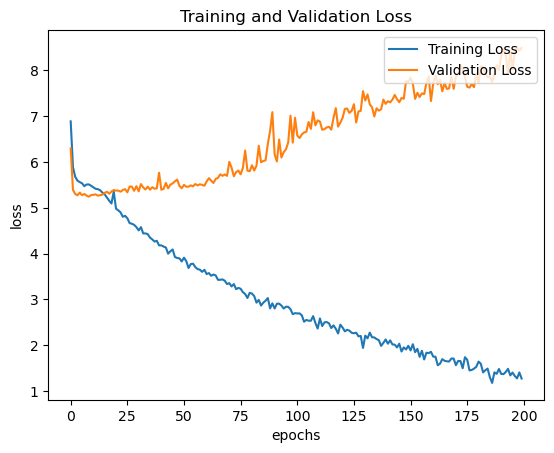

In [44]:
import matplotlib.pyplot as plt

plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

While the training perplexity decreases significantly the validation perplexity increases.

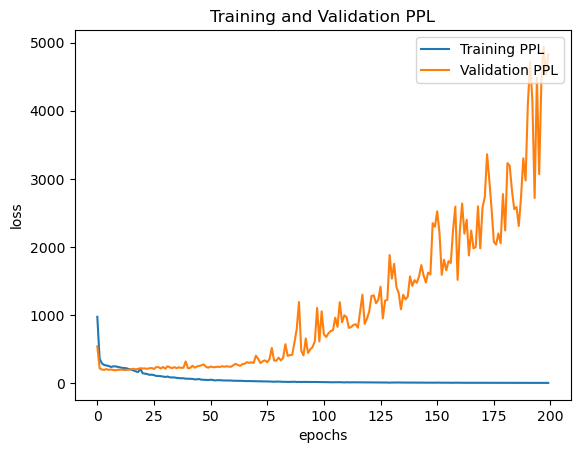

In [45]:
plt.plot(np.exp(training_losses), label='Training PPL')
plt.plot(np.exp(validation_losses), label='Validation PPL')
plt.legend(loc='upper right')
plt.title('Training and Validation PPL')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

The test loss is similar to the validation loss at 7.875 with a high perplexity score of 2631.

In [46]:
model = torch.load("tut2-model.pth")

test_loss = evaluate_fn(model, test_data_loader, criterion, device)

print(f"| Test Loss: {test_loss:.3f} | Test PPL: {np.exp(test_loss):7.3f} |")

| Test Loss: 7.875 | Test PPL: 2631.087 |


## Inference

The following function encodes a question, decodes it using an RNN, and generates an answer token-by-token, guided by an attention mechanism.

In [47]:
def answer_question(
    question,
    model,
    question_vocab,
    answer_vocab,
    sos_token,
    eos_token,
    device,
    max_output_length=100,
):
    model.eval()
    with torch.no_grad():
        if isinstance(question, str):
            question_tokens = [token.text for token in en_nlp.tokenizer(question)]
        else:
            question_tokens = [token for token in question]
        question_tokens = [token.lower() for token in question_tokens]
        question_tokens = [sos_token] + question_tokens + [eos_token]
        ids = question_vocab.lookup_indices(question_tokens)
        tensor = torch.LongTensor(ids).unsqueeze(-1).to(device)
        encoder_outputs, hidden = model.encoder(tensor)
        inputs = answer_vocab.lookup_indices([sos_token])
        attentions = torch.zeros(max_output_length, 1, len(ids))
        for i in range(max_output_length):
            inputs_tensor = torch.LongTensor([inputs[-1]]).to(device)
            output, hidden, attention = model.decoder(
                inputs_tensor, hidden, encoder_outputs
            )
            attentions[i] = attention
            predicted_token = output.argmax(-1).item()
            inputs.append(predicted_token)
            if predicted_token == answer_vocab[eos_token]:
                break
        answer_tokens = answer_vocab.lookup_tokens(inputs)
    return answer_tokens, question_tokens, attentions[: len(answer_tokens) - 1]


An example for a question and the expected answer.

In [48]:
question = test_data[2]["Questions"]
expected_answer = test_data[2]["Answers"]

question, expected_answer

('How can I find a support group?',
 'Support groups are a way for people with a common experience to help each other and learn from each other. There are support groups for people with any experience of mental illness, support groups for people with a specific diagnosis, support groups for family members and friends, and more. \n Support groups are offered by community organizations, mental health service providers, schools, campuses, and support agencies. Here are some general resources to help you find a mental health or substance use related support group in BC: \n Talk to your mental health care provider. They might be able to make recommendations. \n The Mood Disorders Association of BC offers a network of peer support groups around the province for people who experience mental illnesses like mood disorders or post-traumatic stress disorder. They also have groups for family and friends. Groups are drop-in. \n Many Canadian Mental Health Association branches offer support services

The model predicts an answer to the question 'How can I find a support group?'

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

answer, _, _ = answer_question(
    question,
    model,
    question_vocab,
    answer_vocab,
    sos_token,
    eos_token,
    device
)

answer

['<sos>',
 'many',
 'people',
 'find',
 'peer',
 'support',
 'tool',
 'tool',
 'tool',
 'tool',
 'tool',
 'tool',
 'tool',
 'tool',
 'tool',
 '.',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 'tool',
 '.',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 'tool',
 '.',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 'at',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 'at',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 ',',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor',
 'at',
 'you',
 'can',
 'find',
 'a',
 'regular',
 'doctor']

The model's answer to the question 'What is depression?' is similarly nonsensical.

In [50]:
answer, _, _ = answer_question(
    'What is depression?',
    model,
    question_vocab,
    answer_vocab,
    sos_token,
    eos_token,
    device
)

answer

['<sos>',
 'a',
 'illness',
 'is',
 'a',
 'mental',
 'illness',
 'illness',
 'illness',
 ',',
 'or',
 'another',
 'symptoms',
 'of',
 'symptoms',
 'in',
 'a',
 'illness',
 '.',
 'in',
 'the',
 'illness',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'in',
 'your',
 'doctor',
 'or',
 'symptoms',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'found',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'found',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'found',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'found',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'in',
 'your',
 'doctor',
 'or',
 'symptoms',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'symptoms',
 'of',
 'symptoms',
 'in',
 'your',
 'doctor',
 'or',
 'symptoms',
 'in',
 'some',
 'symptoms',
 '.',
 'some',
 'people',
 'who']

## BLEU score

In the following section, the BLEU score for this improved model is calculated.

In [51]:
answers = [
    answer_question(
        example['Questions'],
        model,
        question_vocab,
        answer_vocab,
        sos_token,
        eos_token,
        device
    )[0]
    for example in tqdm.tqdm(test_data)
]


100%|██████████| 21/21 [00:01<00:00, 17.94it/s]


In [52]:
import evaluate

bleu = evaluate.load("bleu")

In [53]:
predictions = [" ".join(answer[1:-1]) for answer in answers]

references = [[example["Answers"]] for example in test_data]

In [54]:
def get_tokenizer_fn(nlp, lower):
    def tokenizer_fn(s):
        tokens = [token.text for token in nlp.tokenizer(s)]
        if lower:
            tokens = [token.lower() for token in tokens]
        return tokens

    return tokenizer_fn

In [55]:
tokenizer_fn = get_tokenizer_fn(en_nlp, True)

In [56]:
results = bleu.compute(
    predictions=predictions, references=references, tokenizer=tokenizer_fn
)

The resulting BLEU score is very small with 0.006, which means that the predicted answers do not fit the ground-truth well. For example, ChatGPT achieves a BLEU score of 0.88 for translation tasks (Ghassemiazghandi, M., 2024. An Evaluation of ChatGPT’s Translation Accuracy Using BLEU Score. tpls 14, 985–994. https://doi.org/10.17507/tpls.1404.07).


In [57]:
results

{'bleu': 0.006103083573543267,
 'precisions': [0.19856770833333334,
  0.0429367420517863,
  0.01221122112211221,
  0.004985044865403789],
 'brevity_penalty': 0.22738292426533116,
 'length_ratio': 0.4030438205195487,
 'translation_length': 3072,
 'reference_length': 7622}

## Closing Thoughts

The shown Seq2seq models struggle with providing meaningful answers due to these reasons:

* **Long and complex answers**: Many mental health queries necessitate detailed, long responses. Seq2seq models, while effective for shorter sequences, struggle to maintain context and generate coherent, comprehensive answers over extended lengths, especially when the training dataset is limited. E.g., when training translation models, 10s or 100s of thousands of examples are needed to produce decent models.
* **Overfitting**: With a relatively small dataset of only 97 rows, the models are overfitting to the specific training data, leading to poor generalization performance on unseen data.

Furthermore, the second model did not perform better than the first model, which can be attributed to the higher complexity while the available training data did not change.

The second Jupyter Notebook demonstrates how an existing language model can be fine-tuned to answer mental health related questions. Fine-tuning a pre-trained language model provides a strong foundation, as it has already been exposed to a large amount of diverse text data. Furthermore, the pre-trained model can converge more quickly on the mental health dataset, requiring less training data.